# House Price Prediction - Advanced Regression - Assignment


**Contributors** - Thamilvaanan T

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
#### The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
 

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



##  Approach

- Load the Data
<br>

- Data Inspection & understanding
    - Go through the Data dictionary, observe data values, study data segments
<br>


- Initial Data cleaning
    - Remove columns which are invalid, has high percentage of null data etc
    - Remove rows with high null data
    - Fix data types, suffixes and prefixes etc.
    - Outlier treatment
<br>


- Data Analysis
    - Univariate Analysis
    - Segmented Univariate Analysis
    - Bivariate/Multivariate Analysis
<br>


- Split Train-Test data sets
<br>


- Data cleaning
    - Handle missing Values ( eg:- Imputations)
<br>


- Data preparation for modeling
    - Transformation of Target Variable
    - Scale the features
<br>


- Feature Selection
    - Use RFE filter and select features
<br>


- Linear Regressions - Regularization & Model Evaluation
    - Ridge Regression
    - Lasso Regression
    - Model coefficients comparison
    - Model Evaluation
<br>


- Recommendations
    - Identify major variables which influence the price of a house to provide recommendation to predict the actual value of the prospective properties.

In [374]:
#import project dependencies

# basic libraries
import numpy as np
import pandas as pd

# plot libraries
import matplotlib.pyplot as plt
import seaborn as sns


#stat and ML libs
#scalling
from sklearn.preprocessing import StandardScaler

#train vs test data split
from sklearn.model_selection import train_test_split

#regression functions
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE


#Model validation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")


### Import and view data

In [375]:
df = pd.read_csv("train.csv", encoding = 'utf-8')


In [376]:
df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [377]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [378]:
df.shape

(1460, 81)

In [379]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Columns with data types

In [380]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Numerical Variables

In [381]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Check for null data

In [382]:
## List down columns with null data

def printPositiveNullCounts():
    df_nullcheck = df.isnull().sum()
    df_nullcheck = df_nullcheck[df_nullcheck > 0]
    print(df_nullcheck)
    print("Number of columns with null values {}".format(len(df_nullcheck)))


In [383]:
printPositiveNullCounts()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Number of columns with null values 19


#### 19 columns has null values

### Null value percentage

In [384]:
def printNullValuePercentage():
    df_nullcheck = df.isnull().sum()
    df_nullcheck = df_nullcheck[df_nullcheck > 0]
    featue_null_percentage = (df_nullcheck[df_nullcheck > 0]/len(df.index))*100
    print(featue_null_percentage.sort_values(ascending=False))

In [385]:
printNullValuePercentage()

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


### Following columns has more than 50% of null values
- PoolQC          
- MiscFeature     
- Alley      
- Fence           

### Check duplicate data

In [386]:
df.duplicated().sum()


0

##### No duplicate entries found in this dataset.


In [387]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data = df.select_dtypes(include=['object'])


## Initial Data Cleaning

### Observations of Columns

- **Id** column can be removed as it has no impact on the prediction
- Columns has more than 50% of null values can be dropped. 
    - **PoolQC**          
    - **MiscFeature**   
    - **Alley**   
    - **Fence**

In [388]:
df.drop(['Id','PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)


In [389]:
df.shape

(1460, 76)

### Outlier treatment

In [390]:
## List down the numeric feature columns ( float, int64)

In [391]:
numeric_data_types = df.dtypes[(df.dtypes == float) | (df.dtypes == 'int64')]
numerical_cols = list(numeric_data_types.index)
print(numerical_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [392]:
### check the percentile of the numeric features

In [393]:
df.describe(percentiles=[0.20,0.25,0.35,0.5,0.65,0.75,0.85,0.90,0.95,0.99])


MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
20%      20.000000    53.000000    7078.400000     5.000000     5.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
35%      20.000000    60.000000    8450.000000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
65%      60.000000    75.000000   10624.350000     7.000000     6.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
85%      90.000000    90.000000   13161.100000     8.000000     7.000000   
90%     120.000000    96.000000   14381.700000     8.000000     7.000000   
95%     160.000000   107.000000   17401.150000     8.000000     8.000000   
99%     190.000000   141.000000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
20%    1947.800000   1961.800000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
35%    1961.000000   1976.000000     0.000000    56.650000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
65%    1993.000000   2000.000000    80.000000   593.350000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
85%    2005.000000   2006.000000   262.350000   929.450000     0.000000  ...   
90%    2006.000000   2006.000000   335.000000  1065.500000   117.200000  ...   
95%    2007.000000   2007.000000   456.000000  1274.000000   396.200000  ...   
99%    2009.000000   2009.000000   791.920000  1572.410000   830.380000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
20%       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
35%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
65%     125.350000    48.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
85%     216.000000   105.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   7944

### IQR & Outlier calculations

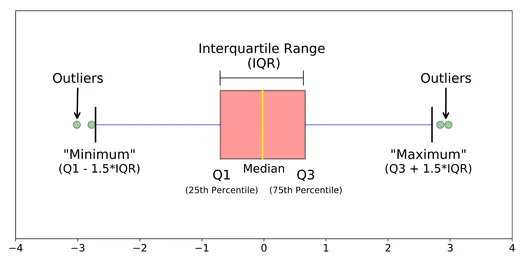

In [394]:
def print_outlier_percentage(isPrint):
    percentage={}
    outlier_counts={}
    for col in numerical_cols:
        ## Calculate IQR
        IQR=df[col].quantile(0.75)-df[col].quantile(0.25)
        count=df[(df[col]>(df[col].quantile(.75)+1.5*IQR)) | (df[col]<(df[col].quantile(.25)-1.5*IQR))].shape[0]
        outlier_counts[col]=count
        percentage[col]=round(count/df.shape[0]*100,2)
        
    # build outlier details dataframe ( columnname, percentage of outliers, outlier count)
    outlier_data=pd.DataFrame({'COlumns ':list(percentage.keys()),'Percentage':list(percentage.values()),'Count':list(outlier_counts.values())})
    if isPrint:
        print(outlier_data.sort_values(by="Percentage", ascending=False))
    return percentage

In [395]:
print('#####################################')
print_outlier_percentage(True)
print('#####################################')

#####################################
         COlumns   Percentage  Count
29  EnclosedPorch       14.25    208
9      BsmtFinSF2       11.44    167
4     OverallCond        8.56    125
31    ScreenPorch        7.95    116
0      MSSubClass        7.05    103
7      MasVnrArea        6.58     96
1     LotFrontage        6.03     88
17   BsmtHalfBath        5.62     82
28    OpenPorchSF        5.27     77
2         LotArea        4.73     69
21   KitchenAbvGr        4.66     68
36      SalePrice        4.18     61
11    TotalBsmtSF        4.18     61
33        MiscVal        3.56     52
20   BedroomAbvGr        2.40     35
27     WoodDeckSF        2.19     32
15      GrLivArea        2.12     31
22   TotRmsAbvGrd        2.05     30
10      BsmtUnfSF        1.99     29
14   LowQualFinSF        1.78     26
30      3SsnPorch        1.64     24
26     GarageArea        1.44     21
12       1stFlrSF        1.37     20
8      BsmtFinSF1        0.48      7
5       YearBuilt        0.48      7


#### Observations and strategy to handle outliers

- Outliers present in most of the features.
- As the outlier percentage is sigificant for some of these features droping them would result in significant data lose.
- Replace the outlier values as per the below rule.
    - if the outlier below minimum (i.e 25th percentile - 1.5 * IQR) then assign them the minimum value
    - if the outlier below maximum (i.e 75th percentile + 1.5 * IQR) then assign them the maximum value
    
- Outlier treatment is not applicable to the target column **SalePrice**


In [396]:
### Iterate through numeric columns and replace the outliers as per the strategy discussed above
outliers_percentage = print_outlier_percentage(False)
print('#####################################')
for column,percentage in outliers_percentage.items():
    if column!='SalePrice':
        IQR = df[column].quantile(.75) - df[column].quantile(.25) 
        max_value = df[column].quantile(.75)+1.5*IQR
        min_value = df[column].quantile(.25)-1.5*IQR
        df[column][df[column] > max_value] = max_value
        df[column][df[column] < min_value ] = min_value

#####################################


### Outlier percentage after handling

In [397]:
print('#####################################')
print_outlier_percentage(True)
print('#####################################')


#####################################
         COlumns   Percentage  Count
36      SalePrice        4.18     61
19       HalfBath        0.00      0
21   KitchenAbvGr        0.00      0
22   TotRmsAbvGrd        0.00      0
23     Fireplaces        0.00      0
24    GarageYrBlt        0.00      0
25     GarageCars        0.00      0
26     GarageArea        0.00      0
27     WoodDeckSF        0.00      0
28    OpenPorchSF        0.00      0
29  EnclosedPorch        0.00      0
30      3SsnPorch        0.00      0
31    ScreenPorch        0.00      0
32       PoolArea        0.00      0
33        MiscVal        0.00      0
34         MoSold        0.00      0
35         YrSold        0.00      0
20   BedroomAbvGr        0.00      0
0      MSSubClass        0.00      0
1     LotFrontage        0.00      0
17   BsmtHalfBath        0.00      0
2         LotArea        0.00      0
3     OverallQual        0.00      0
4     OverallCond        0.00      0
5       YearBuilt        0.00      0


In [398]:
# observe the percentiles of the numeric columns again
df.describe(percentiles=[0.20,0.25,0.35,0.5,0.65,0.75,0.85,0.90,0.95,0.99])


MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000   1460.000000  1460.000000  1460.000000   
mean     55.085616    69.134888   9647.388014     6.100685     5.543493   
std      37.508183    19.662022   3594.356399     1.378430     0.963696   
min      20.000000    27.500000   1481.500000     2.000000     3.500000   
20%      20.000000    53.000000   7078.400000     5.000000     5.000000   
25%      20.000000    59.000000   7553.500000     5.000000     5.000000   
35%      20.000000    60.000000   8450.000000     5.000000     5.000000   
50%      50.000000    69.000000   9478.500000     6.000000     5.000000   
65%      60.000000    75.000000  10624.350000     7.000000     6.000000   
75%      70.000000    80.000000  11601.500000     7.000000     6.000000   
85%      90.000000    90.000000  13161.100000     8.000000     7.000000   
90%     120.000000    96.000000  14381.700000     8.000000     7.000000   
95%     145.000000   107.000000  17401.150000     8.000000     7.500000   
99%     145.000000   111.500000  17673.500000    10.000000     7.500000   
max     145.000000   111.500000  17673.500000    10.000000     7.500000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000      1460.0  ...   
mean   1971.299315   1984.865753    90.192149   439.997517         0.0  ...   
std      30.108397     20.645407   134.925253   433.219435         0.0  ...   
min    1885.000000   1950.000000     0.000000     0.000000         0.0  ...   
20%    1947.800000   1961.800000     0.000000     0.000000         0.0  ...   
25%    1954.000000   1967.000000     0.000000     0.000000         0.0  ...   
35%    1961.000000   1976.000000     0.000000    56.650000         0.0  ...   
50%    1973.000000   1994.000000     0.000000   383.500000         0.0  ...   
65%    1993.000000   2000.000000    80.000000   593.350000         0.0  ...   
75%    2000.000000   2004.000000   166.000000   712.250000         0.0  ...   
85%    2005.000000   2006.000000   262.350000   929.450000         0.0  ...   
90%    2006.000000   2006.000000   335.000000  1065.500000         0.0  ...   
95%    2007.000000   2007.000000   415.000000  1274.000000         0.0  ...   
99%    2009.000000   2009.000000   415.000000  1572.410000         0.0  ...   
max    2010.000000   2010.000000   415.000000  1780.625000         0.0  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000         1460.0     1460.0       1460.0   
mean     91.806849    42.603425            0.0        0.0          0.0   
std     116.658120    52.501584            0.0        0.0          0.0   
min       0.000000     0.000000            0.0        0.0          0.0   
20%       0.000000     0.000000            0.0        0.0          0.0   
25%       0.000000     0.000000            0.0        0.0          0.0   
35%       0.000000     0.000000            0.0        0.0          0.0   
50%       0.000000    25.000000            0.0        0.0          0.0   
65%     125.350000    48.000000            0.0        0.0          0.0   
75%     168.000000    68.000000            0.0        0.0          0.0   
85%     216.000000   105.000000            0.0        0.0          0.0   
90%     262.000000   130.000000            0.0        0.0          0.0   
95%     335.000000   170.000000            0.0        0.0          0.0   
99%     420.000000   170.000000            0.0        0.0          0.0   
max     420.000000   170.000000            0.0        0.0          0.0   

       PoolArea  MiscVal       MoSold       YrSold      SalePrice  
count    1460.0   1460.0  1460.000000  1460.000000    1460.000000  
mean        0.0      0.0     6.321918  2007.815753  180921.195890  
std         0.0      0.0     2.703626     1.328095   79442.502883  
min         0.0      0.0     1.000000  2006.000000   34900.000000  
20%         0.0  

## Data Analysis


### Numeric columns - Univariate and Bivariate analysis


####  Numeric columns - Correlation

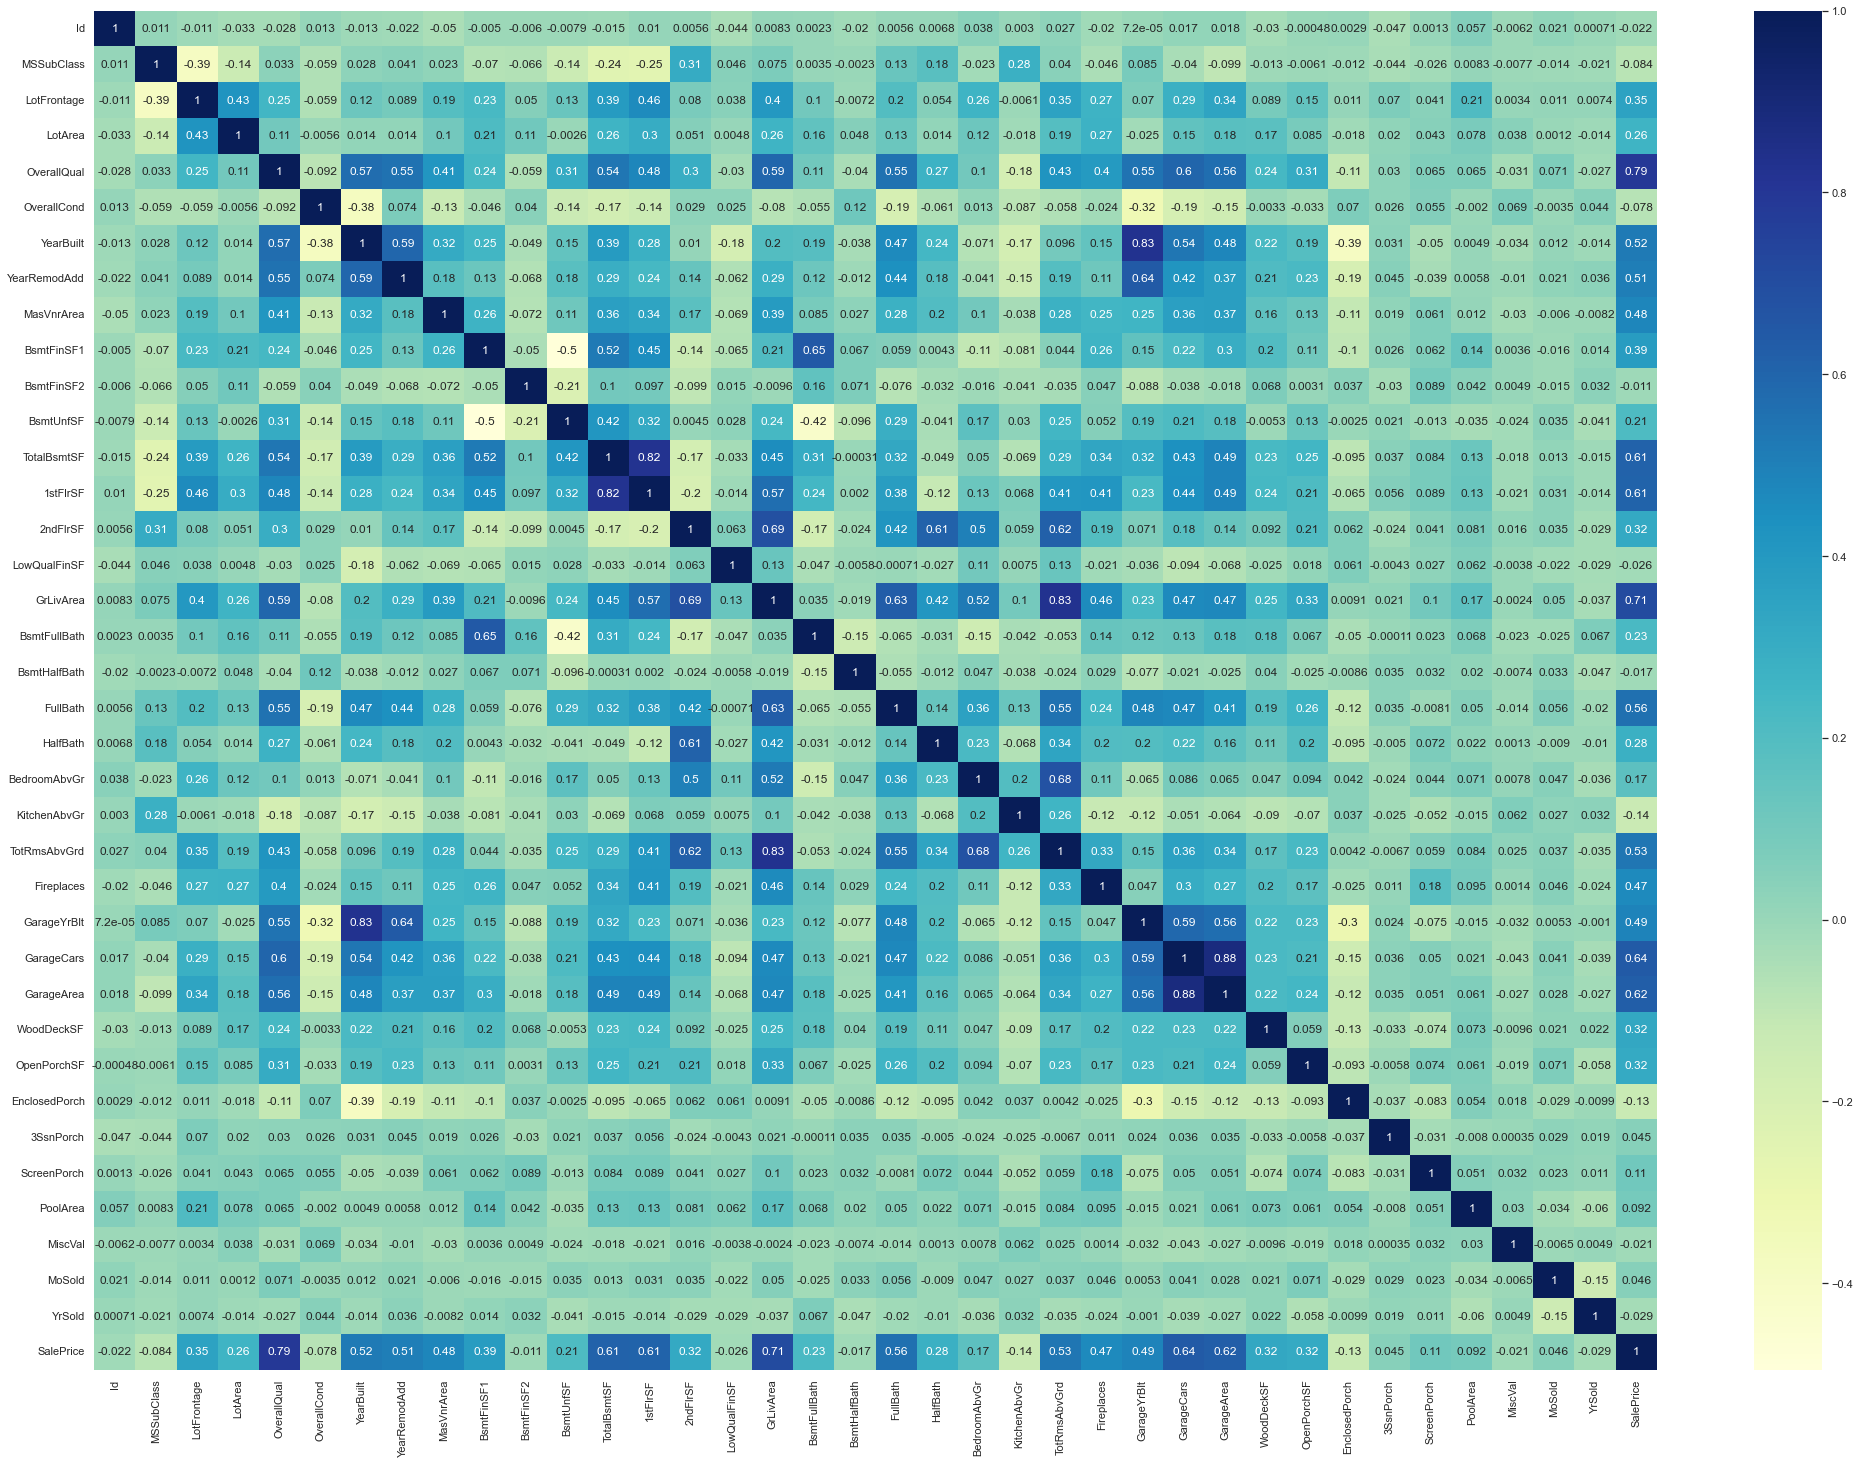

In [399]:
plt.figure(figsize=(35,25))

corr = numerical_data.corr()
sns.heatmap(corr, annot= True, cmap="YlGnBu")

plt.show()



#### Observations

- Following feature pairs has high correlation
    - **GarageYrBlt** vs **YearBuilt** (0.83)
    - **GarageArea** vs **GarageCars** (0.88)
    - **GrLivArea** vs **TotRmsAbvGrd** (0.83)
    - **TotalBsmtSF** vs **1stflrSF** (0.82)

<br/>

- One of the feature from each pair can be dropped after EDA.

### Use scatter plot on these highly correlated features to check their predictive power against the target column

37


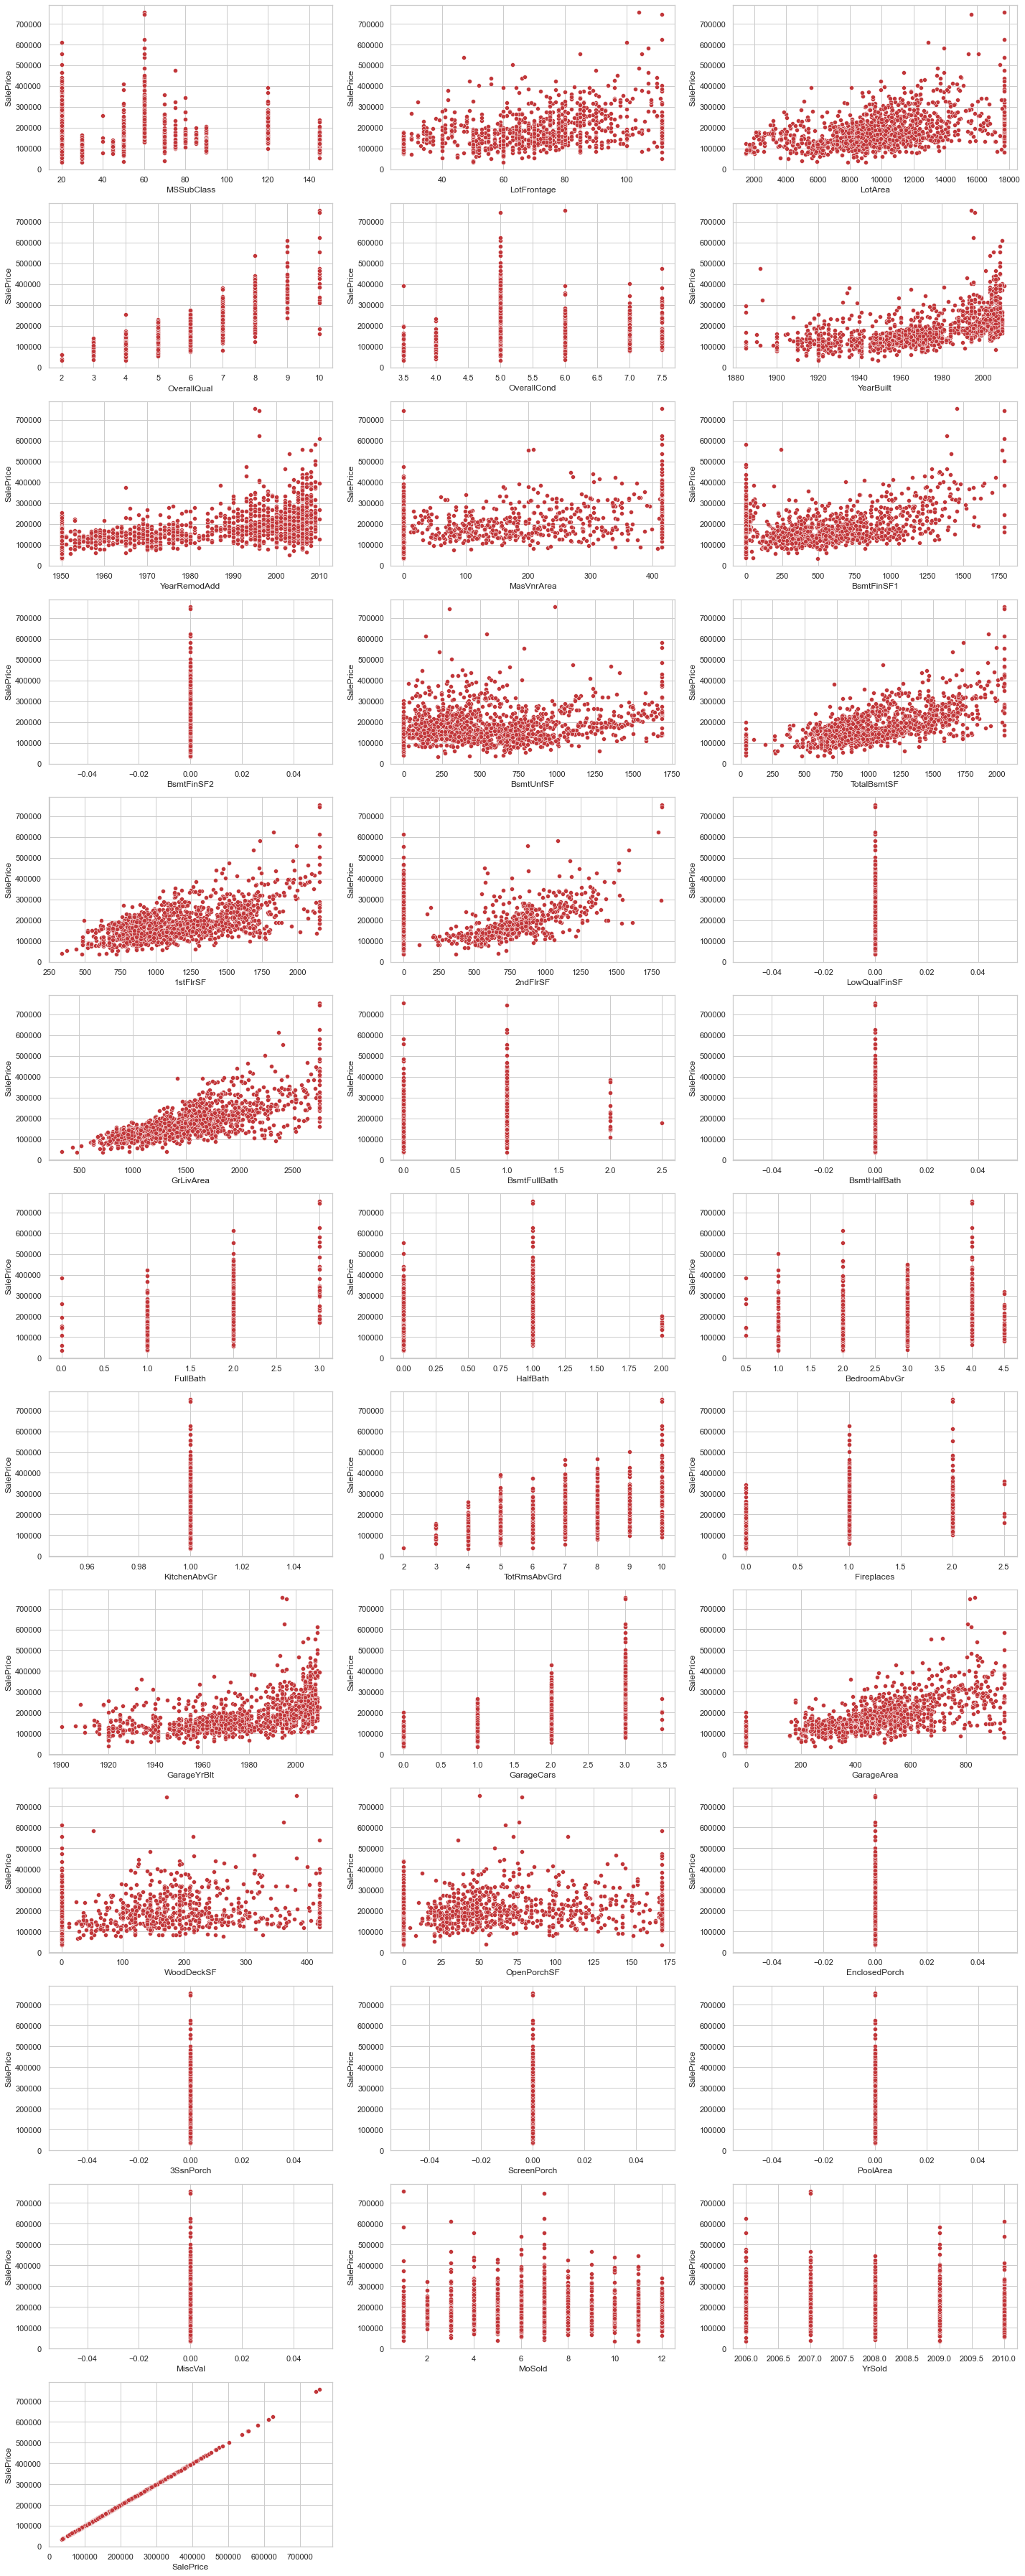

In [400]:
numeric_data_types = df.dtypes[(df.dtypes == float) | (df.dtypes == 'int64')]
numerical_cols = list(numeric_data_types.index)
print(len(numerical_cols))

fig=plt.subplots(figsize=(20, 50))
for i, col in enumerate(numerical_cols):
    plt.subplot(13, 3, i + 1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(df[col], df['SalePrice'])
    plt.tight_layout()

#### Observations

- Following features are postively correlated with target variable '**SalePrice**'.
    - **LotFrontage**
    - **LotArea**
    - **TotalBsmtSF**
    - **1stFlrSF**
    - **2ndFlrSF**
    - **GrLivArea** 
    - **GarageArea**

- Following features has single value hence it may not be contributing in predicting '**SalePrice**' so these can be dropped.
    - **BsmtSF2**
    - **LowQualFinSF**
    - **EnclosedPorch**
    - **3SsnPorch**
    - **ScreenPorch** 
    - **PoolArea**
    - **MiscVal**

### Numerical Features - Distribution

### Target Varible - 'SalePrice'

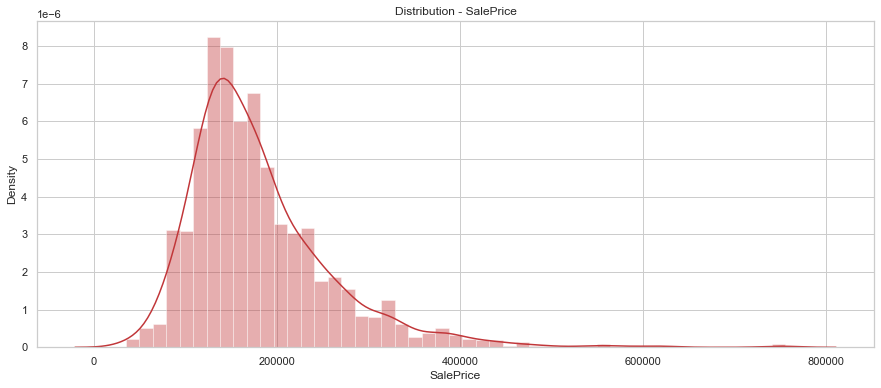

In [401]:
plt.figure(figsize=(15, 6))
plt.title('Distribution - SalePrice')

sns.distplot(df['SalePrice'])
plt.show()


#### SalePrice distribution is right skewed, log transform would help to handle this.

#### Visualize the log transformed data first

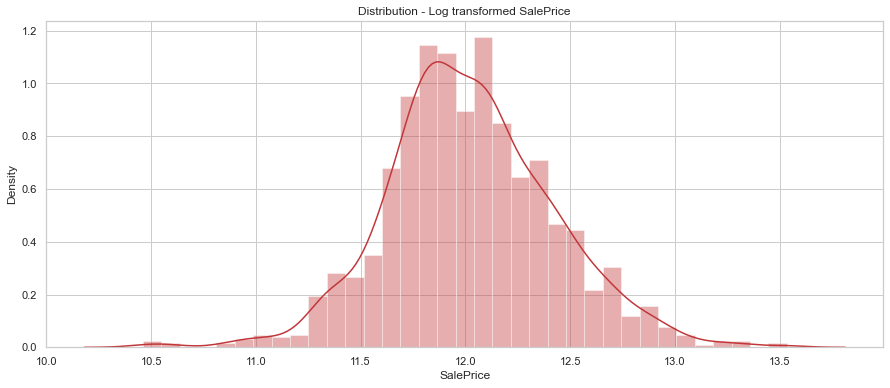

In [402]:
plt.figure(figsize=(15, 6))
sns.distplot(np.log(df['SalePrice']))
plt.title('Distribution - Log transformed SalePrice')
plt.show()

#### Log transformation SalePrice looks normally distributed hence later we would be using log transformed SalePrice modeling.

In [403]:
# function to plot histplot and displot for numeric fields
def hist_box_plot(df,field):
        ##print(df[field].describe(percentiles=[0.15,0.2,0.25,0.5,0.7,0.75,0.8,0.85]))
        sns.set(style="whitegrid")
        sns.set_palette('RdBu')
        fig, ax=plt.subplots(1,2,figsize=(20,8))
        ax[0].set_title(field +" Dist Plot",fontsize=18)
        
        ax[0].xaxis.label.set_color('red')
        ax[0].yaxis.label.set_color('blue')
        ax[0].set_xlabel( field , size = 16 )
        
        
        sns.distplot(df[field],ax=ax[0])
        ax[1].set_title(field +" Box Plot",fontsize=18)
        sns.boxplot(data =df, x=field,ax=ax[1],orient='v')
        ax[1].set_xlabel( field , size = 16 )

        ax[1].xaxis.label.set_color('red')
        plt.show()

### Visualize Continuous Numeric features 

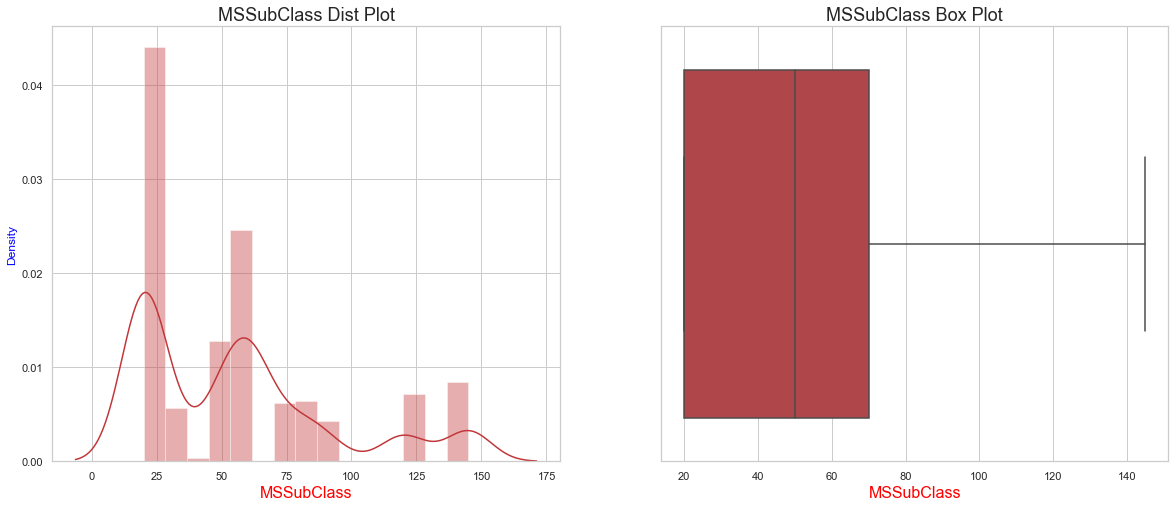

In [404]:
hist_box_plot(df,'MSSubClass')

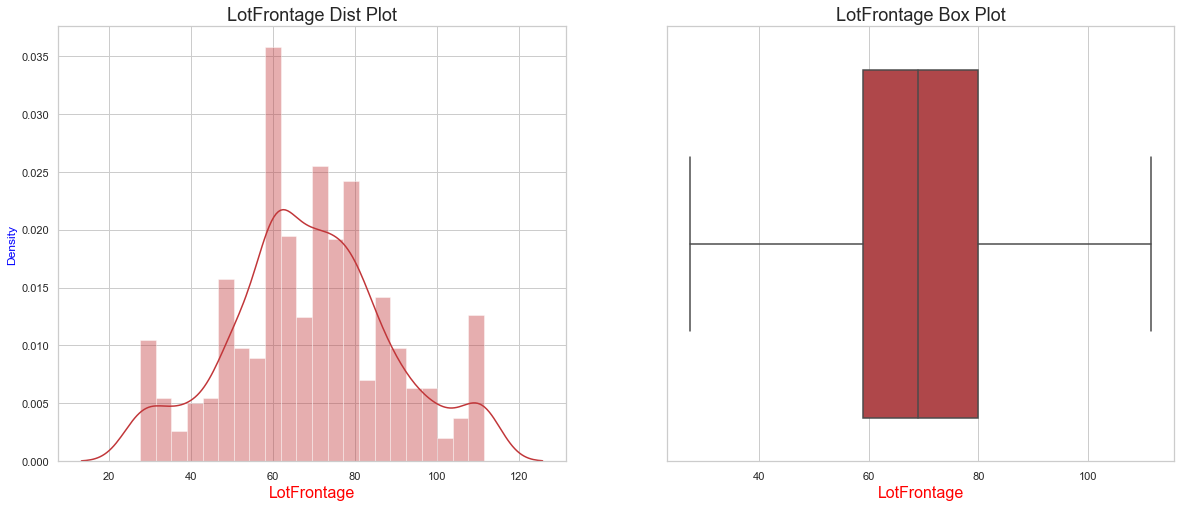

In [405]:
hist_box_plot(df,'LotFrontage')

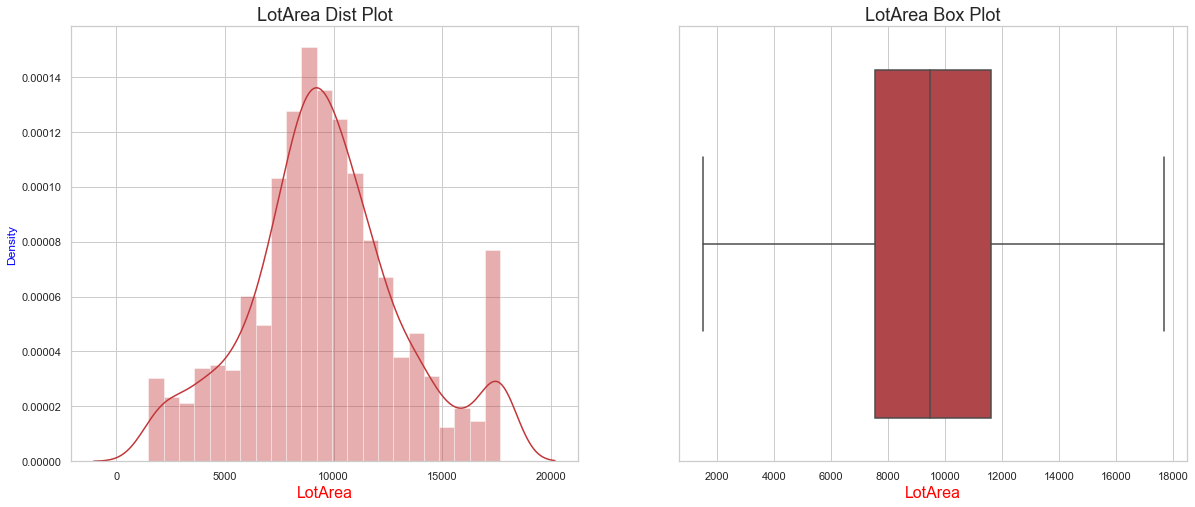

In [406]:
hist_box_plot(df,'LotArea')

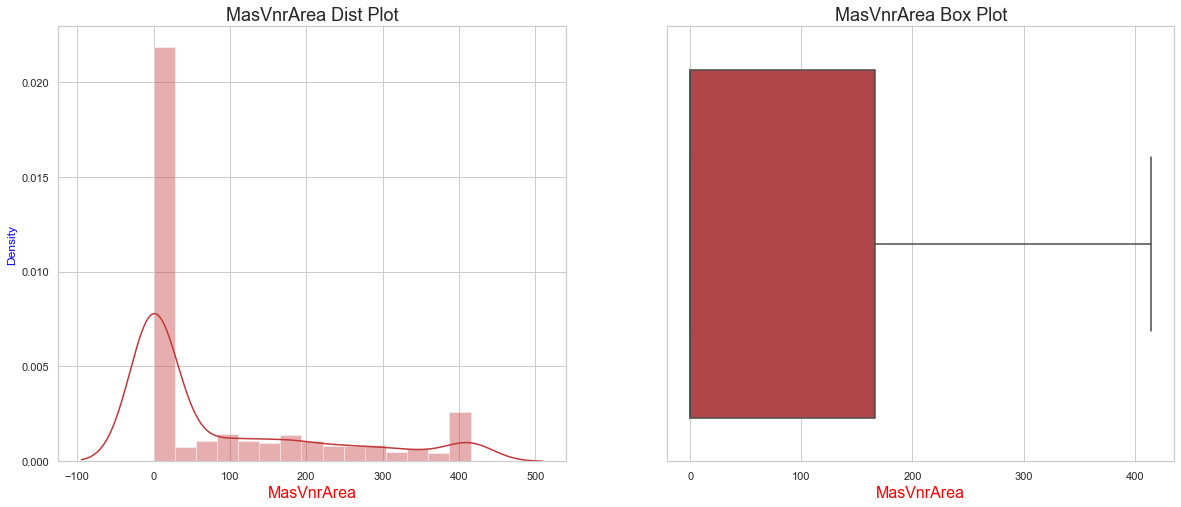

In [407]:
hist_box_plot(df,'MasVnrArea')

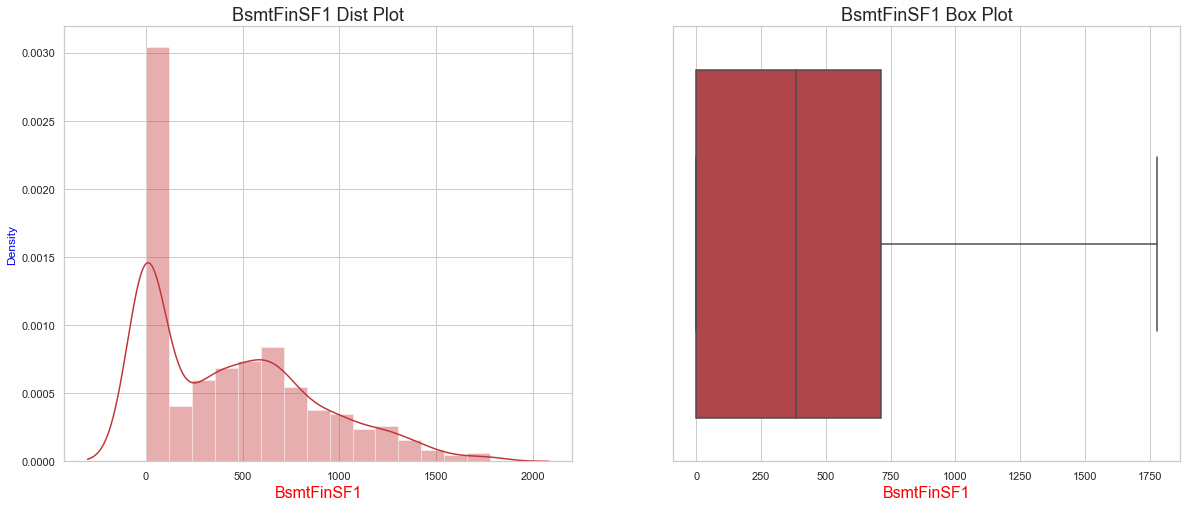

In [408]:
hist_box_plot(df,'BsmtFinSF1')

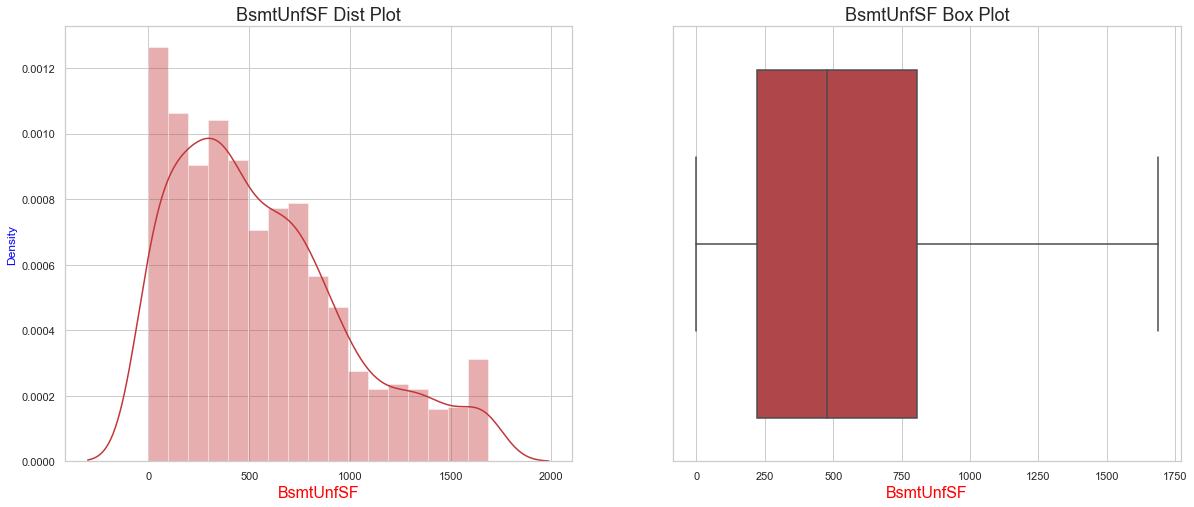

In [409]:
hist_box_plot(df,'BsmtUnfSF')

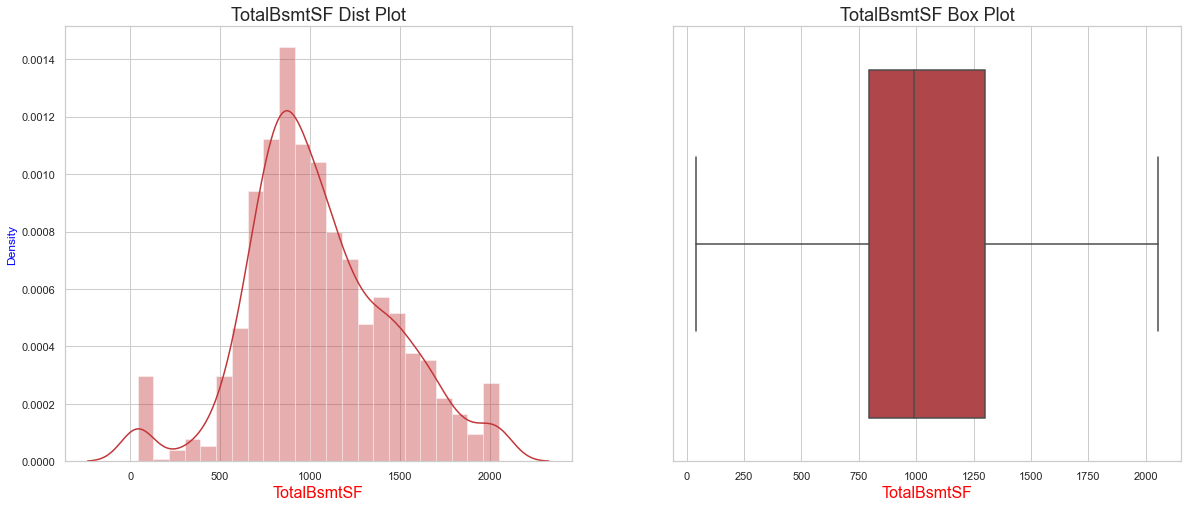

In [410]:
hist_box_plot(df,'TotalBsmtSF')

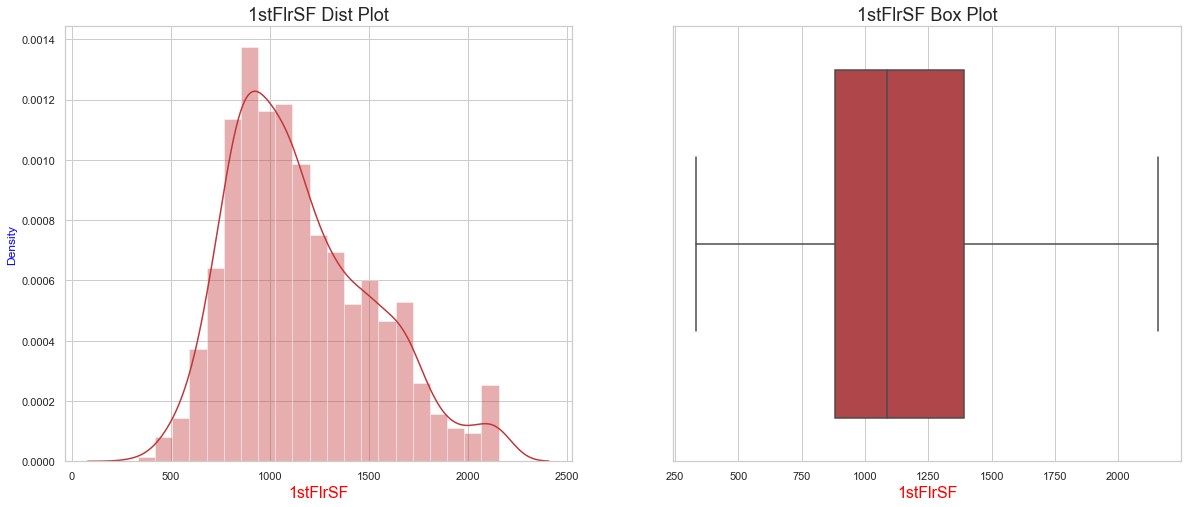

In [411]:
hist_box_plot(df,'1stFlrSF')

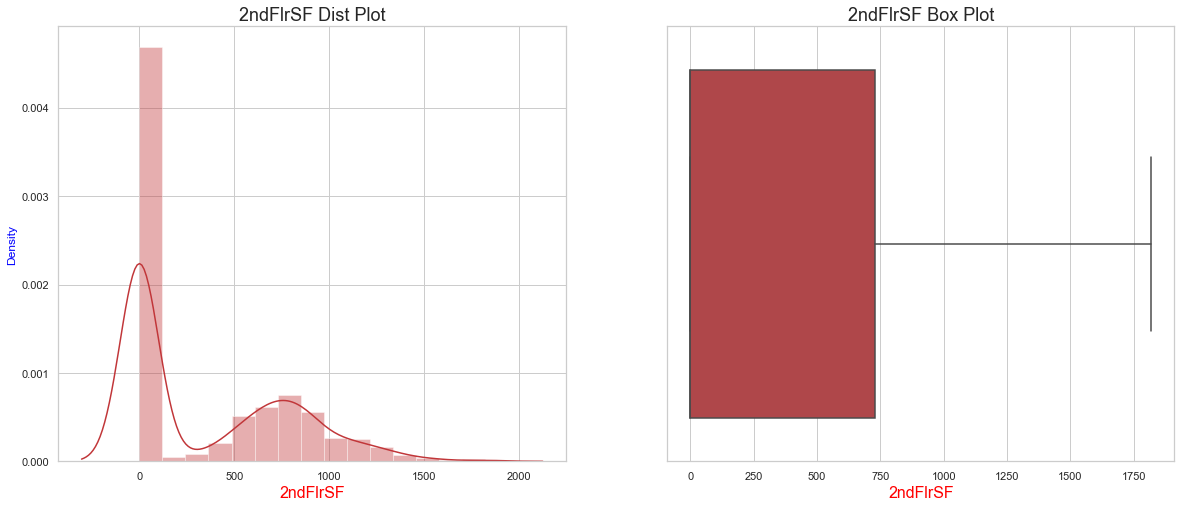

In [412]:
hist_box_plot(df,'2ndFlrSF')

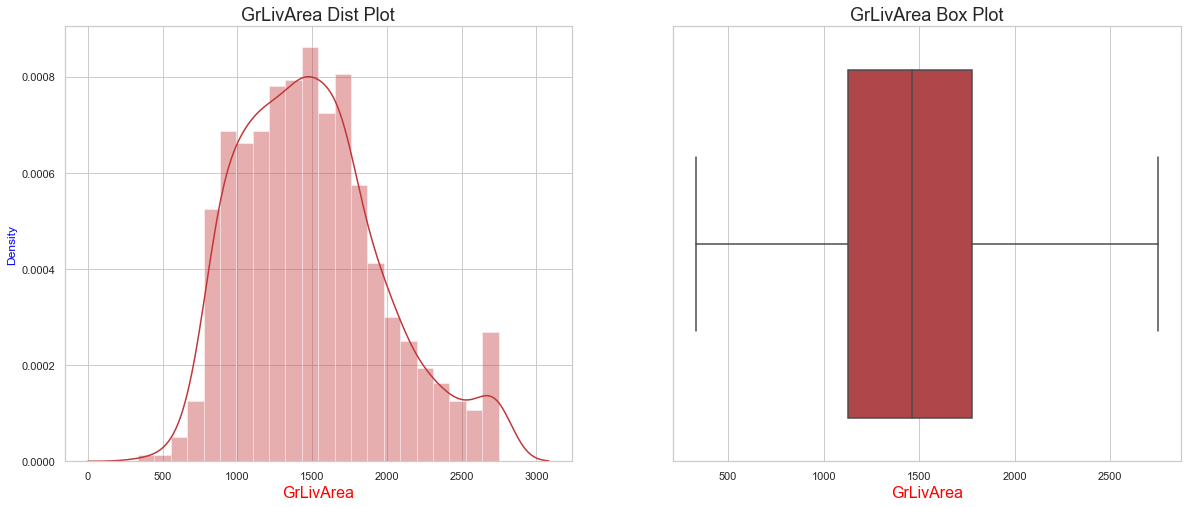

In [413]:
hist_box_plot(df,'GrLivArea')

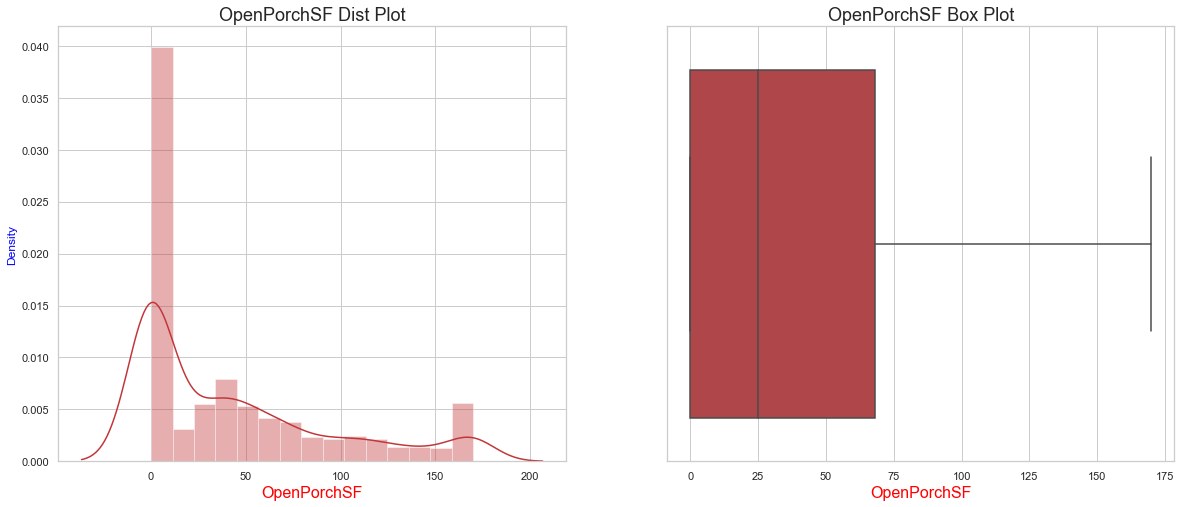

In [414]:
hist_box_plot(df,'OpenPorchSF')

In [415]:
### Revisit and handle the numerical features which has only one value

In [416]:
df[[ '3SsnPorch', 'ScreenPorch', 'LowQualFinSF','PoolArea', 'MiscVal', 'EnclosedPorch']].describe()


3SsnPorch  ScreenPorch  LowQualFinSF  PoolArea  MiscVal  EnclosedPorch
count     1460.0       1460.0        1460.0    1460.0   1460.0         1460.0
mean         0.0          0.0           0.0       0.0      0.0            0.0
std          0.0          0.0           0.0       0.0      0.0            0.0
min          0.0          0.0           0.0       0.0      0.0            0.0
25%          0.0          0.0           0.0       0.0      0.0            0.0
50%          0.0          0.0           0.0       0.0      0.0            0.0
75%          0.0          0.0           0.0       0.0      0.0            0.0
max          0.0          0.0           0.0       0.0      0.0            0.0

#### Above 6 features with single value to be removed as they won't contribute to the prediction model.

In [417]:
df.drop(['3SsnPorch', 'ScreenPorch', 'LowQualFinSF','PoolArea', 'MiscVal', 'EnclosedPorch'], axis=1, inplace=True)


In [418]:
df.shape

(1460, 70)

In [419]:
#Remaining features
list(df.columns)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold',
 'SaleType

### Visualize Continuous Numeric features vs **SalePrice**

In [420]:
def bar_plot_3column(list_of_columns):
    fig=plt.subplots(figsize=(15, 5))

    for i, col in enumerate(list_of_columns):
        plt.subplot(1, len(list_of_columns),i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.barplot(df[col], df['SalePrice'])
        plt.tight_layout()

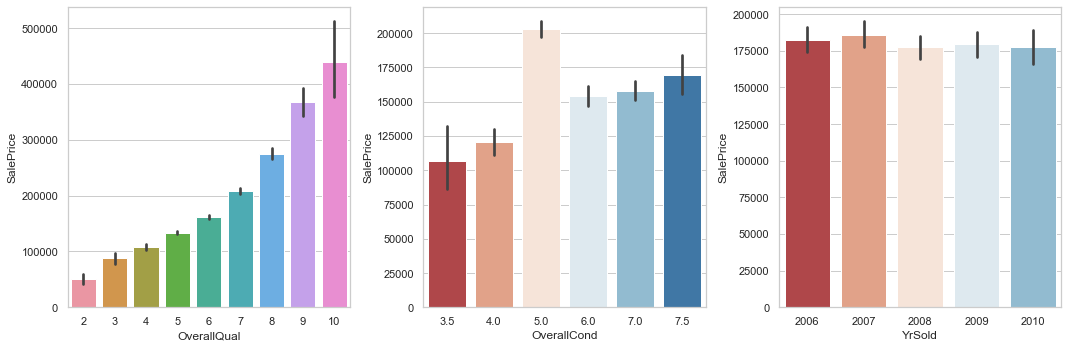

In [421]:
bar_plot_3column(['OverallQual','OverallCond','YrSold'])

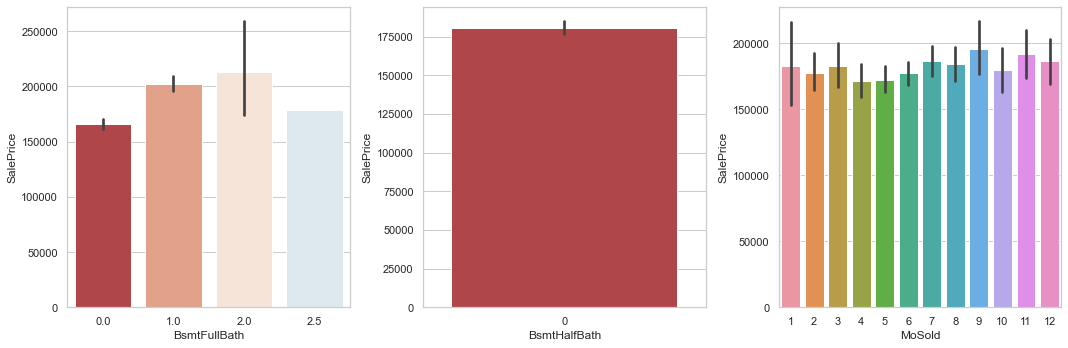

In [422]:
bar_plot_3column(['BsmtFullBath','BsmtHalfBath','MoSold'])

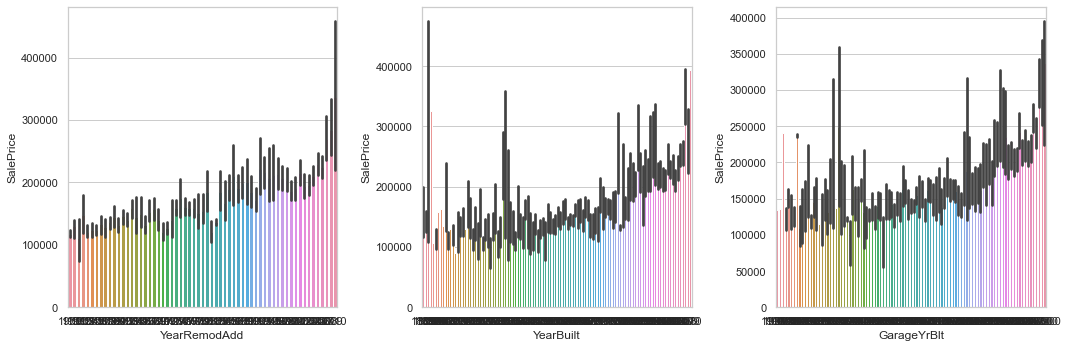

In [423]:
bar_plot_3column(['YearRemodAdd','YearBuilt','GarageYrBlt'])

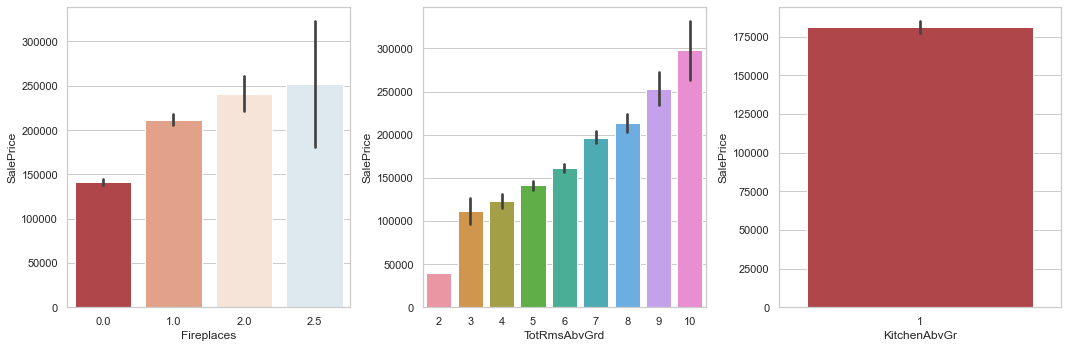

In [424]:
bar_plot_3column(['Fireplaces','TotRmsAbvGrd','KitchenAbvGr'])

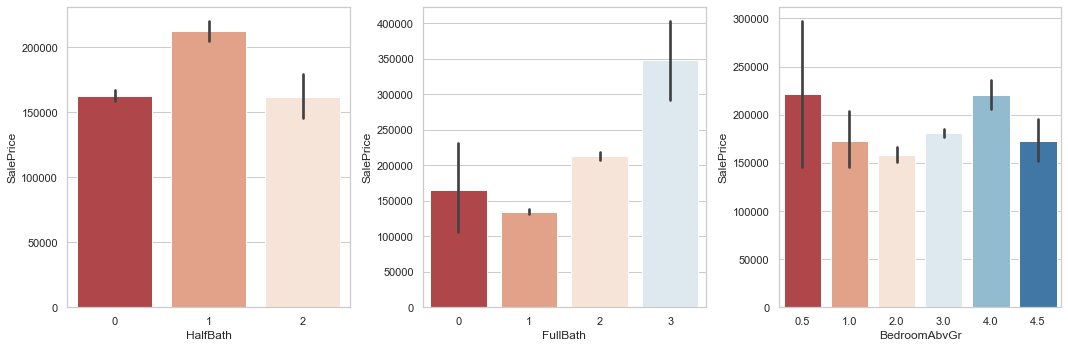

In [425]:
bar_plot_3column(['HalfBath','FullBath','BedroomAbvGr'])

#### Observations

 - '**OverallQual**' and '**TotRmsAbvGrd**': Higher "Overall material and finish of the house" and higher "Total rooms above grade" contributes to higher "**SalePrice**"
 
- **SalePrice** have highest values when the '**FullBath' = 2** and for '**HalfBath' = 1**.
 
- **OverallCond** : SalePrice is highest for **rating 5**.

- **MoSold** : **SalePrice** slightly lower in **April** and **May** but other then that no significant trend found for **MoSold**

- **YrSold** : **SalePrice** slightly lower in **2008** but other then that no significant trend found for **YrSold**

- **BsmtFullBath** and **KitchenAbvGr** : The barplot against **SalePrice** doesn't show any meaningful insights hence we may need to further analyse this.

- **YrSold**, **YearBuilt**,**YearRemodAdd**,**GarageYrBlt**  : Needs further analysis.



In [426]:
### check the quantiles for the features which need further analysis

In [427]:
df[['YrSold','GarageYrBlt','YearBuilt','BsmtFullBath', 'KitchenAbvGr','YearRemodAdd']].describe()


YrSold  GarageYrBlt    YearBuilt  BsmtFullBath  KitchenAbvGr  \
count  1460.000000  1379.000000  1460.000000   1460.000000        1460.0   
mean   2007.815753  1978.506164  1971.299315      0.425000           1.0   
std       1.328095    24.689725    30.108397      0.517373           0.0   
min    2006.000000  1900.000000  1885.000000      0.000000           1.0   
25%    2007.000000  1961.000000  1954.000000      0.000000           1.0   
50%    2008.000000  1980.000000  1973.000000      0.000000           1.0   
75%    2009.000000  2002.000000  2000.000000      1.000000           1.0   
max    2010.000000  2010.000000  2010.000000      2.500000           1.0   

       YearRemodAdd  
count   1460.000000  
mean    1984.865753  
std       20.645407  
min     1950.000000  
25%     1967.000000  
50%     1994.000000  
75%     2004.000000  
max     2010.000000

##### For **BsmtFullBath** and **KitchenAbvGr** The barplot against **SalePrice** is not clear, so check the unique value counts.

In [428]:
print(df['KitchenAbvGr'].value_counts())
print(df['BsmtFullBath'].value_counts())


1    1460
Name: KitchenAbvGr, dtype: int64
0.0    856
1.0    588
2.0     15
2.5      1
Name: BsmtFullBath, dtype: int64


In [429]:
### KitchenAbvGr can be dropped as it's single value and BsmtFullBath can exist as per the current analysis

In [430]:
df.drop(['KitchenAbvGr'], axis=1, inplace=True)


In [431]:
df.shape

(1460, 69)

##### It make more sense to convert the following features into number of years for further analysis
- GarageYrBlt
- YearBuilt
- YearRemodAdd
- YrSold

In [432]:
# Converting the year related features into number of years

for feature in ['YrSold', 'YearBuilt', 'GarageYrBlt','YearRemodAdd' ]:
    df[feature] = 2022 - df[feature]


In [433]:
# Take binmin,binmax and binrange and plot bar,scatter and box plots for numeric features.
def bar_and_scatter_plots(col,binMax,binMin,binRange):
    fig,ax = plt.subplots(2,2, figsize=(25,20))
    ax=ax.flatten()
    bins = pd.cut(df[col], bins=range(binMin,binMax,binRange), labels=[f'{l}-{l+binRange}' for l in range(binMin,(binMax-binRange),binRange)])
    sns.barplot(x=bins, y=df['SalePrice'] , ax=ax[0])
    sns.boxplot(x=bins, y=df['SalePrice'], ax=ax[1])
    sns.scatterplot(x=df[col], y=df['SalePrice'], ax=ax[2])

    ax.flat[-1].set_visible(False)


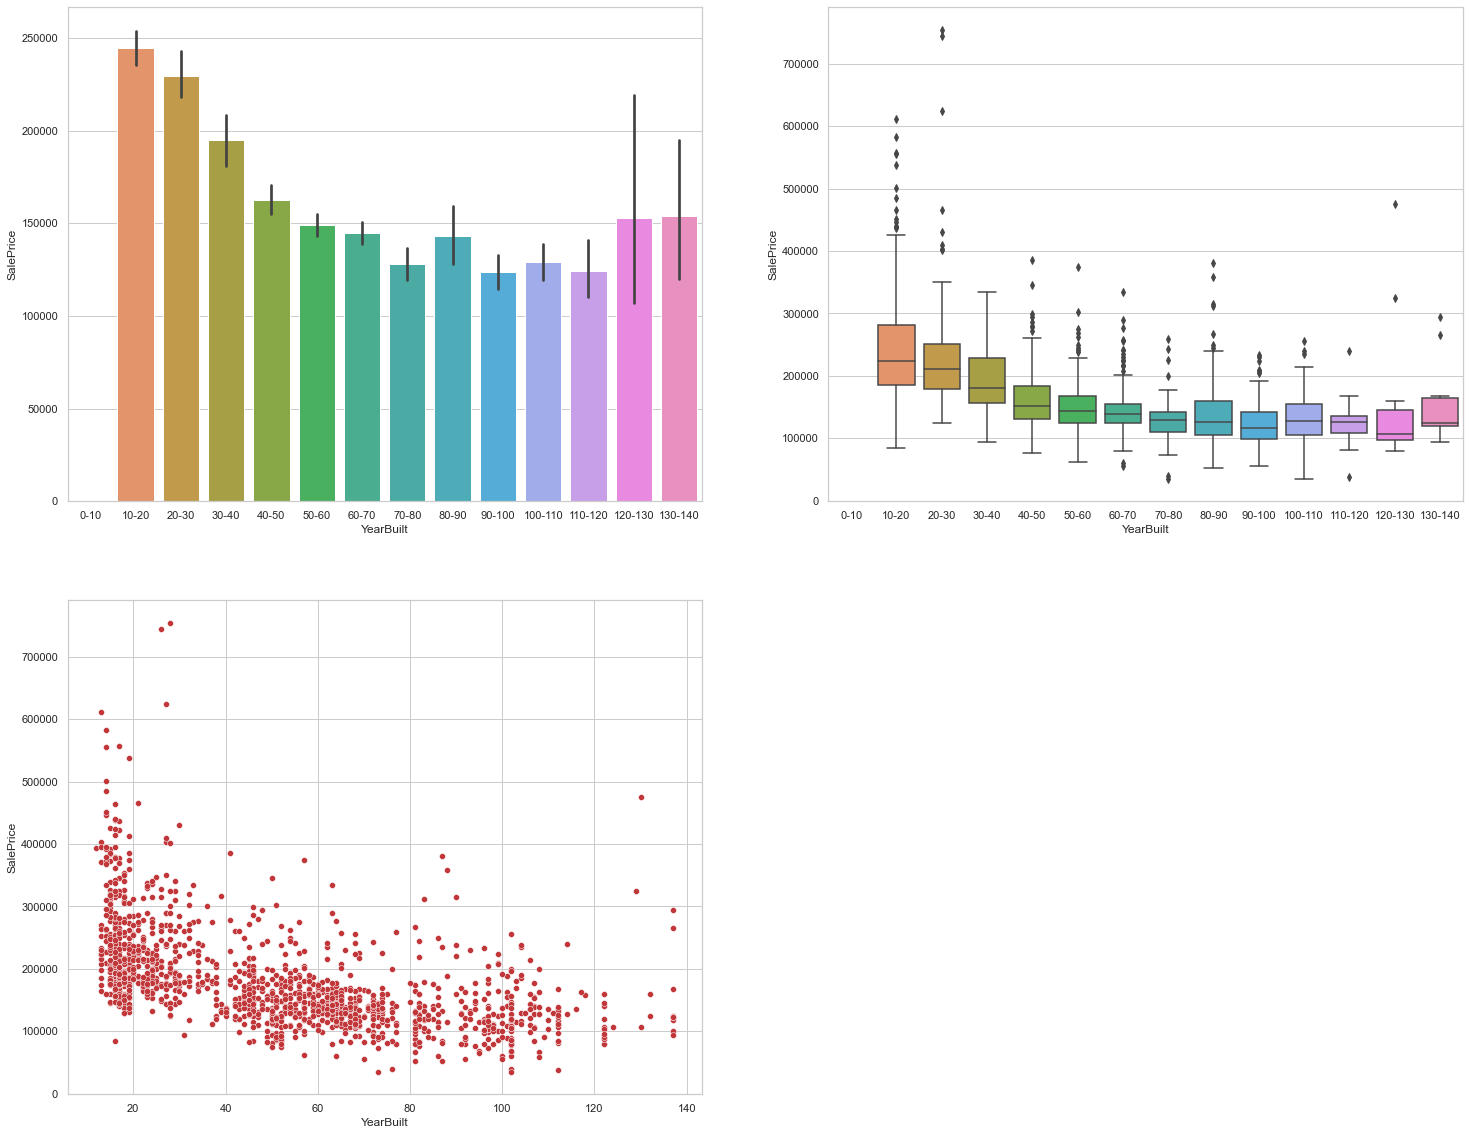

In [434]:
bar_and_scatter_plots("YearBuilt",141,0,10)

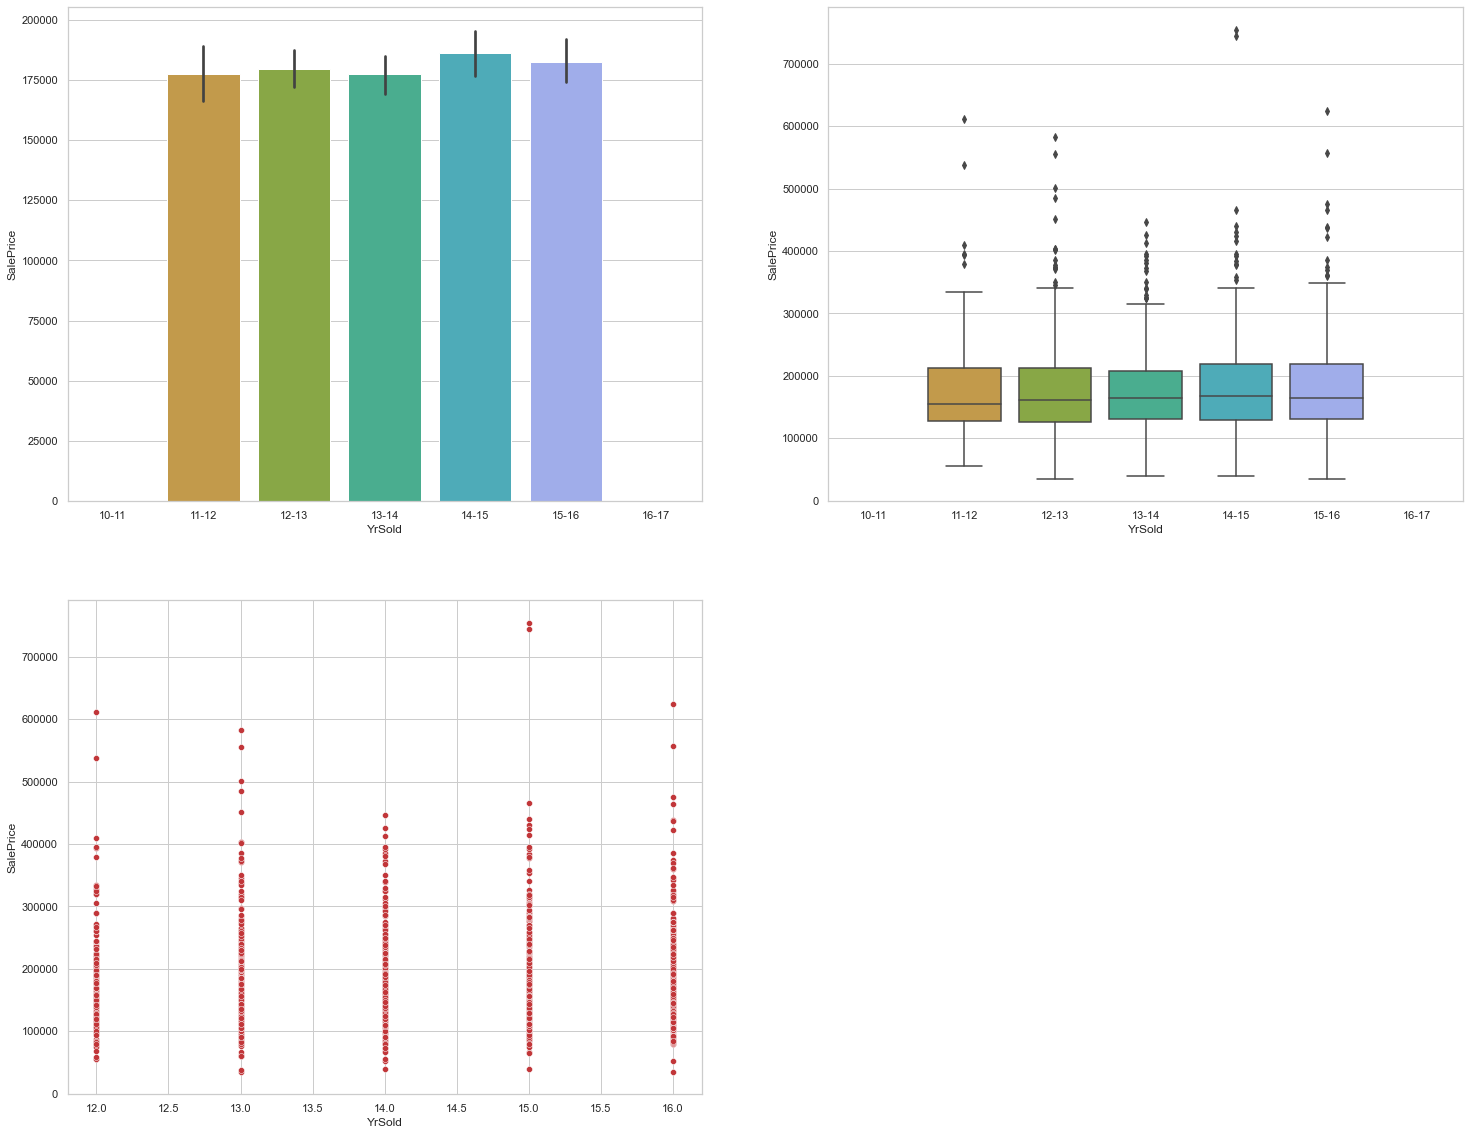

In [435]:
bar_and_scatter_plots("YrSold",18,10,1)

bar_and_scatter_plots("GarageYrBlt",141,0,10)

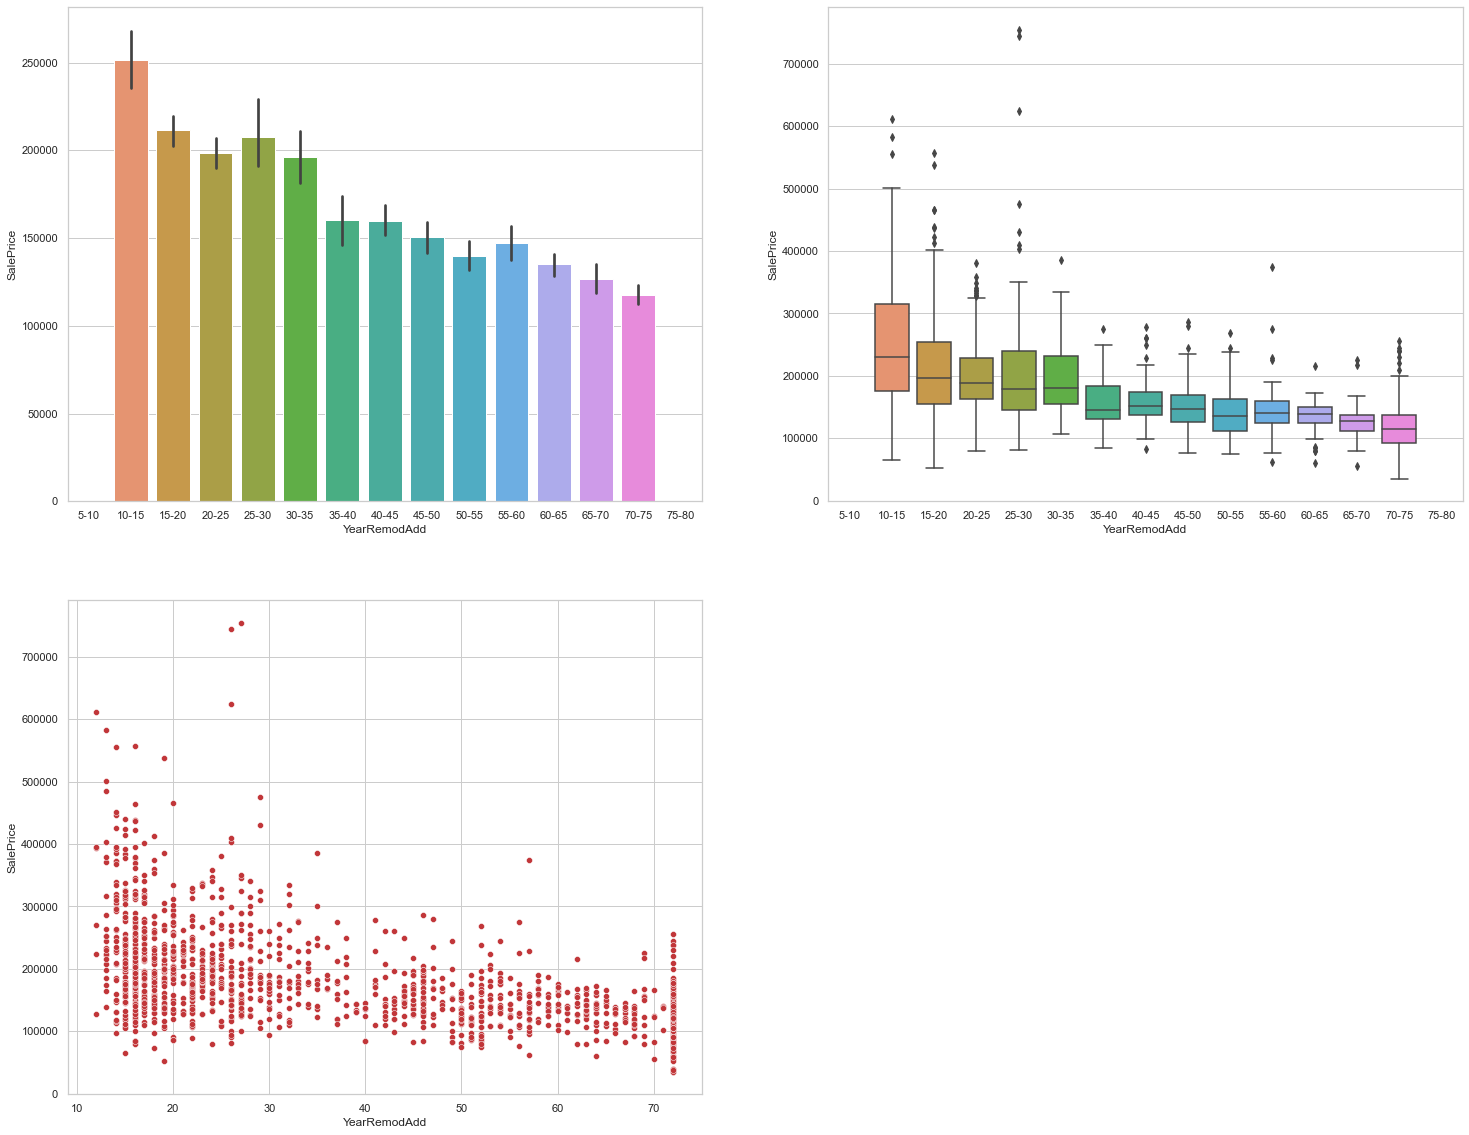

In [436]:
bar_and_scatter_plots("YearRemodAdd",81,5,5)

### Observations

- **YrSold** does not show any significant trend in these graphs.
- **YearBuilt** : Newer houses has higher **SalePrice** , specially houses within last 20 has a highest value.
- **GarageYrBlt** : Follows similar trend as **YearBuilt**. Where houses with recently build garage has more value.
- **YearRemodAdd** : Recently remodelled houses has better **SalePrice** value and it reduced with number of years since remodelled.

#### We yet to drive any insights for the YrSold, we can derive a new column  'Sold Property Age '  by finding the difference between YearBuilt and YrSold.


In [437]:
df['SoldPropAge'] = (df['YearBuilt'] - df['YrSold'])
df[['SoldPropAge']].head()


SoldPropAge
0            5
1           31
2            7
3           91
4            8

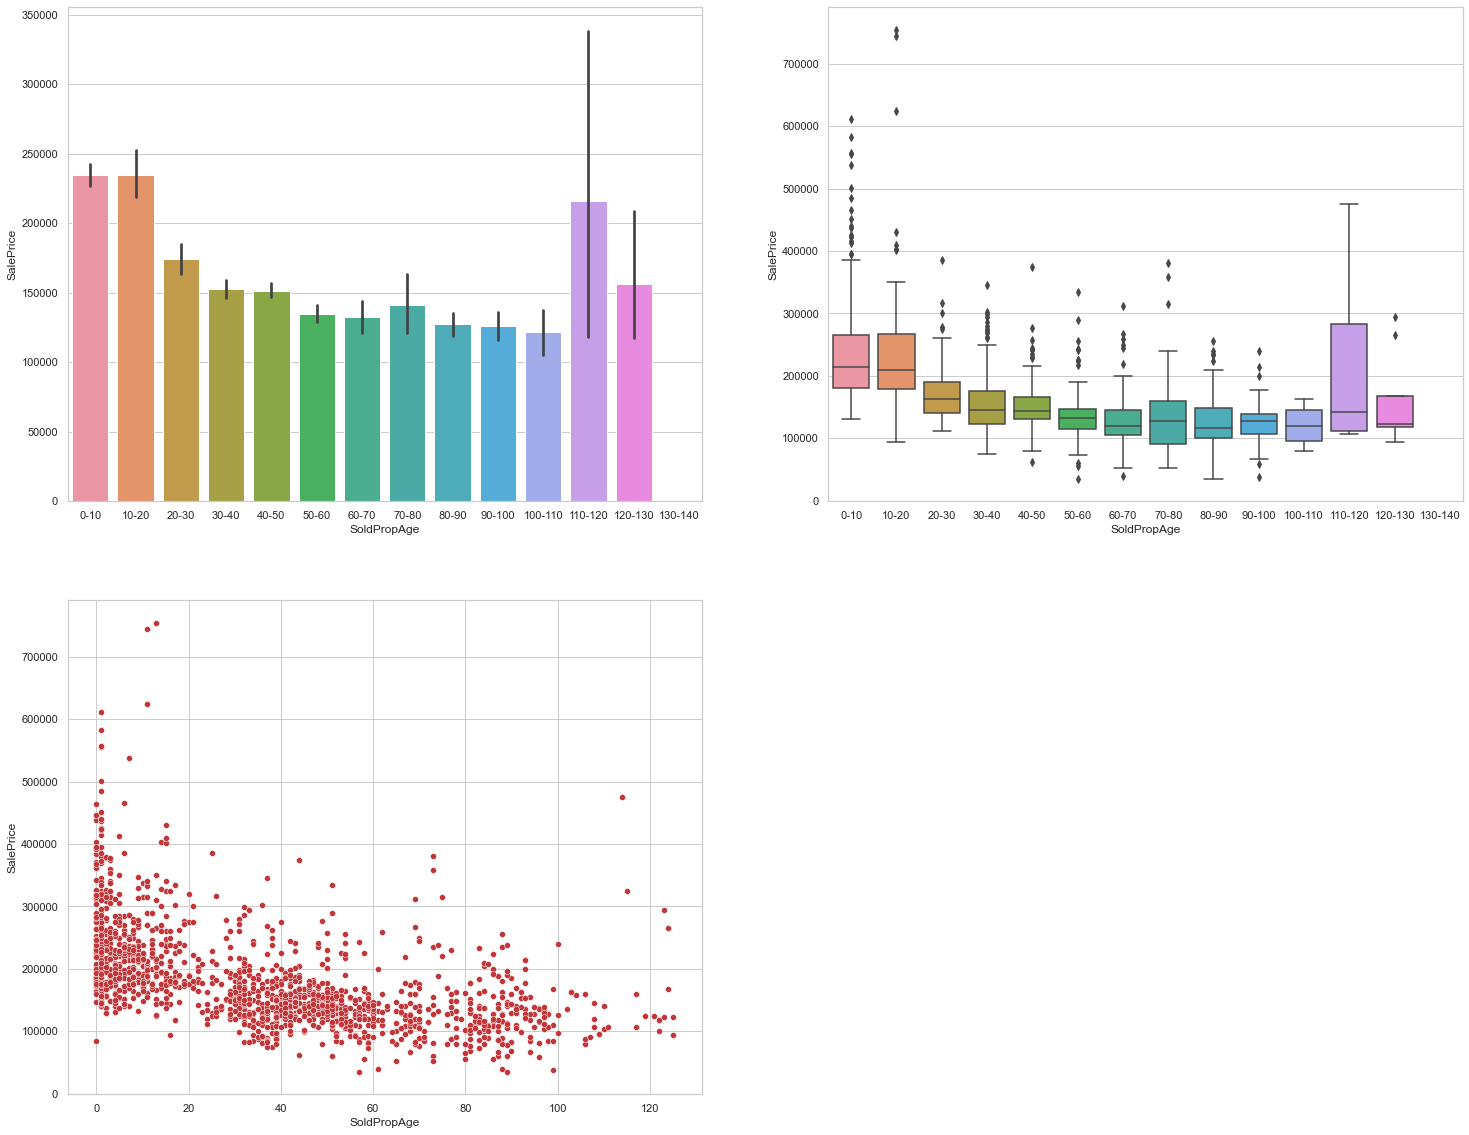

In [438]:
bar_and_scatter_plots("SoldPropAge",141,0,10)

#### saleprice trend decrease with the property age.


#### Now we can drop the following numerical columns based on the observations above.

- **MoSold** and **YrSold** - Can be dropped as they are not significant.

- **'GarageCars', 'GarageYrBlt', 'GrLivArea' and 'TotalBsmtSF'**  - As observed above these can be dropped because of their high correlation with some other features.

    - GarageCars vs GarageArea 
    - GarageYrBlt vs YearBuilt 
    - TotRmsAbvGrd vs GrLivArea 
    - TotalBsmtSF vs 1stflrSF
    
- Above drived variable **SoldPropAge** can be dropped as it shows similar trend as the **YearBuilt** variable used to drive it.

<br/>

- During initial analysis it has been observed there are missing values in some of the features, these has to be handled(eg:- imputed) after train vs test data split.



In [439]:
df.drop(['MoSold','YrSold'], axis=1, inplace=True)
df.drop(['GarageCars',  'TotalBsmtSF', 'GrLivArea','GarageYrBlt'], axis=1, inplace=True)


In [440]:

df.drop(['SoldPropAge'], axis=1, inplace=True)


In [441]:
df.shape

(1460, 63)

In [442]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0   8450.0   Pave      Reg         Lvl   
1          20       RL         80.0   9600.0   Pave      Reg         Lvl   
2          60       RL         68.0  11250.0   Pave      IR1         Lvl   
3          70       RL         60.0   9550.0   Pave      IR1         Lvl   
4          60       RL         84.0  14260.0   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... GarageFinish GarageArea GarageQual  \
0    AllPub    Inside       Gtl  ...          RFn      548.0         TA   
1    AllPub       FR2       Gtl  ...          RFn      460.0         TA   
2    AllPub    Inside       Gtl  ...          RFn      608.0         TA   
3    AllPub    Corner       Gtl  ...          Unf      642.0         TA   
4    AllPub       FR2       Gtl  ...          RFn      836.0         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  SaleType  SaleCondition  \
0         TA          Y           0           61        WD         Normal   
1         TA          Y         298            0        WD         Normal   
2         TA          Y           0           42        WD         Normal   
3         TA          Y           0           35        WD        Abnorml   
4         TA          Y         192           84        WD         Normal   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 63 columns]

### Categorical Variables

In [443]:
list(categorical_data.columns)


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Handling missing values in categorical variables

<br/>

- **Note**: Unlike numerical variables imputation on categorical varibles should not impact the test data set hence considering imputation of categorical variables here before train test data split.

In [444]:
printPositiveNullCounts()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64
Number of columns with null values 14


In [445]:
printNullValuePercentage()

FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


In [446]:
# Electrical got very less percentage(0.06% , i.e only 1 row) of null values.
# MasVnrArea got very less percentage(0.54% , i.e only 8 rows) of null values.
# Either this can be imputed with mean/mode/median or can be dropped as the number of rows are not sigificant 
# chosing to drop the missing row
df = df[pd.notnull(df['Electrical'])]
df = df[pd.notnull(df['MasVnrArea'])]

df.shape

(1451, 63)

In [447]:
printPositiveNullCounts()
printNullValuePercentage()

LotFrontage     257
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
FireplaceQu     685
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64
Number of columns with null values 11
FireplaceQu     47.208822
LotFrontage     17.711923
GarageCond       5.582357
GarageQual       5.582357
GarageFinish     5.582357
GarageType       5.582357
BsmtFinType2     2.618884
BsmtExposure     2.618884
BsmtFinType1     2.549966
BsmtCond         2.549966
BsmtQual         2.549966
dtype: float64


### Data definition indicates the NA in these columns would indicates the absense of the feature/facility and this can effect the price prediction if the null values are not handled properly.
eg:- 

- NA in **FireplaceQu** indicates **No Fireplace**
- NA in **GarageCond,GarageQual,GarageFinish**, and **GarageType** indicates **No Garage**


### Missing values in these features with 'NA' to be replaced with some other meaningfull values.

In [448]:
# Missing values here will be imputed with the value "Not_Applicable"
columns_with_null = ["FireplaceQu","GarageCond","GarageQual","GarageFinish","GarageType","BsmtFinType2","BsmtExposure","BsmtFinType1","BsmtCond","BsmtQual"]
df[columns_with_null].head()

FireplaceQu GarageCond GarageQual GarageFinish GarageType BsmtFinType2  \
0         NaN         TA         TA          RFn     Attchd          Unf   
1          TA         TA         TA          RFn     Attchd          Unf   
2          TA         TA         TA          RFn     Attchd          Unf   
3          Gd         TA         TA          Unf     Detchd          Unf   
4          TA         TA         TA          RFn     Attchd          Unf   

  BsmtExposure BsmtFinType1 BsmtCond BsmtQual  
0           No          GLQ       TA       Gd  
1           Gd          ALQ       TA       Gd  
2           Mn          GLQ       TA       Gd  
3           No          ALQ       Gd       TA  
4           Av          GLQ       TA       Gd

In [449]:
df[columns_with_null] = df[columns_with_null].fillna(value='Not_Applicable', axis=1)

In [450]:
df[columns_with_null].head()

FireplaceQu GarageCond GarageQual GarageFinish GarageType BsmtFinType2  \
0  Not_Applicable         TA         TA          RFn     Attchd          Unf   
1              TA         TA         TA          RFn     Attchd          Unf   
2              TA         TA         TA          RFn     Attchd          Unf   
3              Gd         TA         TA          Unf     Detchd          Unf   
4              TA         TA         TA          RFn     Attchd          Unf   

  BsmtExposure BsmtFinType1 BsmtCond BsmtQual  
0           No          GLQ       TA       Gd  
1           Gd          ALQ       TA       Gd  
2           Mn          GLQ       TA       Gd  
3           No          ALQ       Gd       TA  
4           Av          GLQ       TA       Gd

In [451]:
printPositiveNullCounts()

LotFrontage    257
dtype: int64
Number of columns with null values 1


In [452]:
printNullValuePercentage()

LotFrontage    17.711923
dtype: float64


#### All the categorical feature missing values has been imputed.

### Categorical Variables - Univariate and Bivariate analysis

### Categorical Variables - Ordered Features


In [453]:
ordered_cat_cols = ['GarageFinish','GarageQual','GarageCond','BsmtExposure','BsmtFinType1','BsmtFinType2','LotShape','Utilities','LandSlope','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu']

In [454]:
# SalePrice vs categorical feature box plot
def boxplot_vs_saleprice(features):
    fig=plt.subplots(figsize=(15, 6))
    for i, feature in enumerate(features):
        plt.subplot(1, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(df['SalePrice'], df[feature])
        plt.tight_layout()

#### Segmenting the categorical variables for better analysis

- **Interior Features**
    - HeatingQC, KitchenQual,Functional,FireplaceQu
    

- **Exterior Features**
    - LotShape,Utilities,LandSlope,HouseStyle,ExterQual,ExterCond
    
    <br/>
    
- **Garage Features**
    - GarageFinish, GarageQual,GarageCond
    
    <br/>
    
- **Basement Features**
    - BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
    



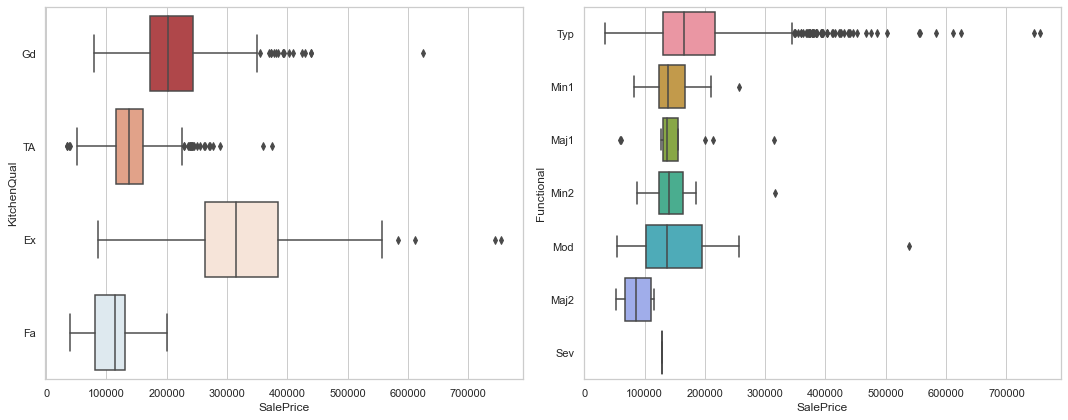

In [455]:
boxplot_vs_saleprice(['KitchenQual','Functional'])

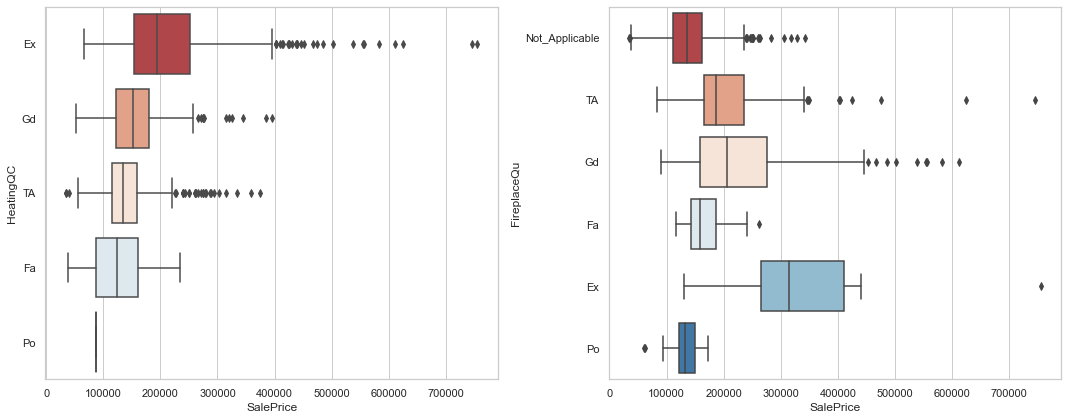

In [456]:
boxplot_vs_saleprice(['HeatingQC','FireplaceQu'])

#### Observations

- **KitchenQual** and **HeatingQC**: Highest SalePrice recorded for the Houses having **Excellent** heating quality and kitchen quality.


- **Functional**: 
    - Highest SalePrice recorded for the houses with **Typical functionality**. 
    - Only few houses found in the severely damaged category.
    
   
- **FireplaceQu**:
    - Highest SalePrice recorded for the Houses having **Excellent** Fireplace quality.
    - Average(TA) typed fireplace quality houses has a high SalePrice range compre to others.

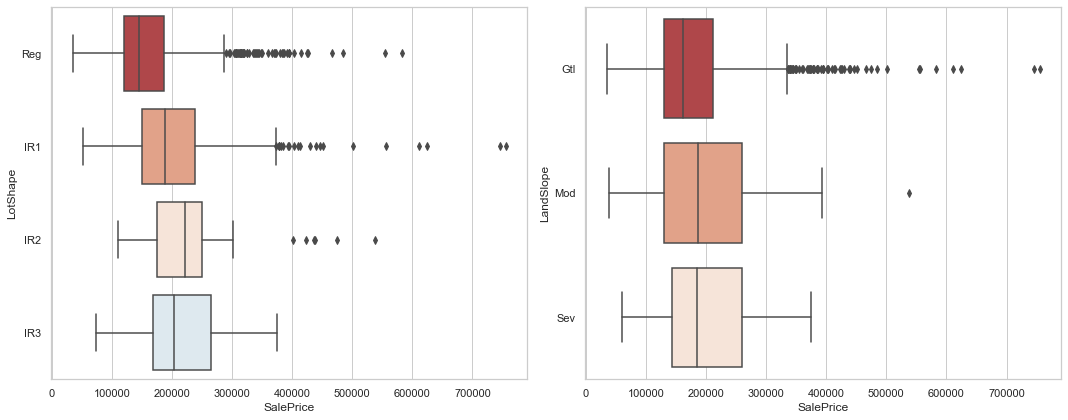

In [457]:
boxplot_vs_saleprice(['LotShape','LandSlope'])

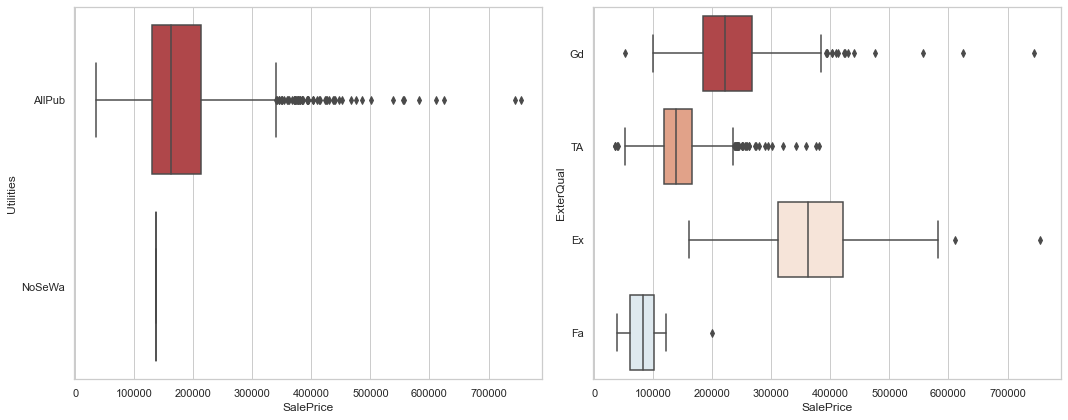

In [458]:
boxplot_vs_saleprice(['Utilities','ExterQual'])

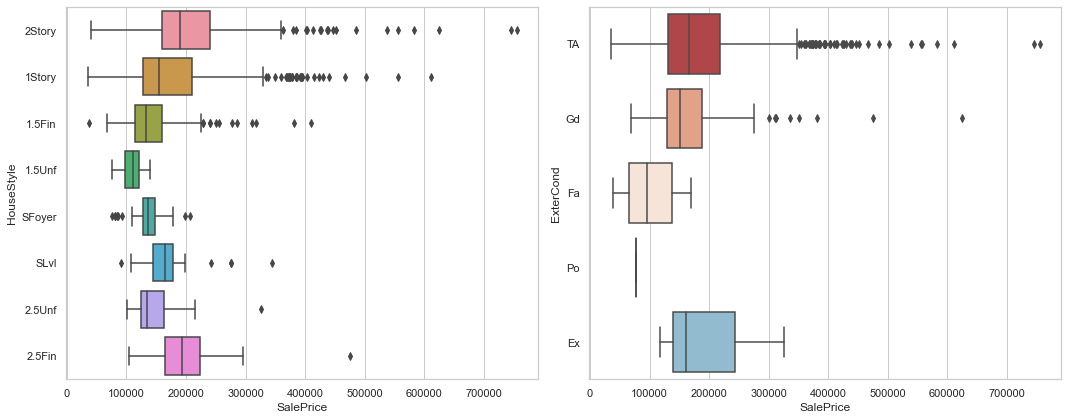

In [459]:
boxplot_vs_saleprice(['HouseStyle','ExterCond'])

#### Observations

- Highest SalePrice recorded for the following feature categories.
    - **LotShape** - **Slightly irregular**
    - **HouseStyle** - **Two story**
    - **ExterQual** - **Excellent** quality of material on the exterior
    - **ExterCond** - **Excellent** condition of material on the exterior
    
    
- **LandSlope** - Lowest SalePrice recorded for the **Severe Slope** houses.


- **Utilities** - Majority of the houses fall into the **All public Utilities (E,G,W,& S)** category.


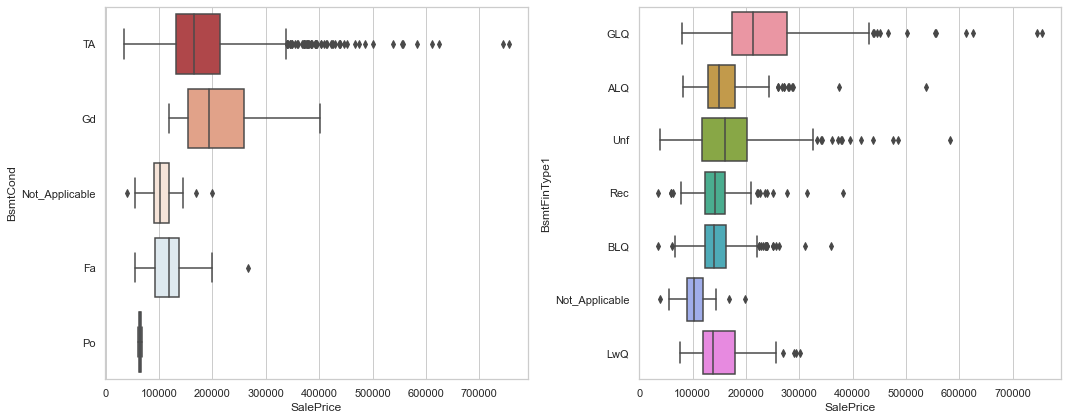

In [460]:
boxplot_vs_saleprice(['BsmtCond','BsmtFinType1'])

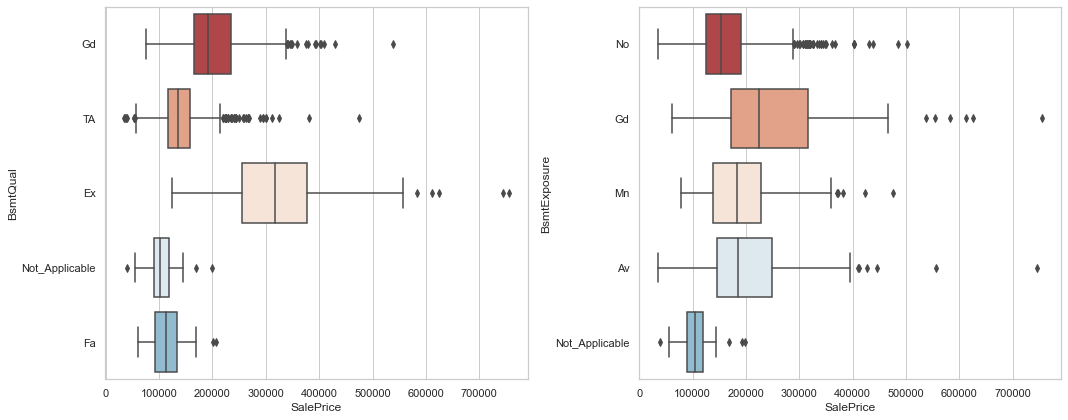

In [461]:
boxplot_vs_saleprice(['BsmtQual','BsmtExposure'])

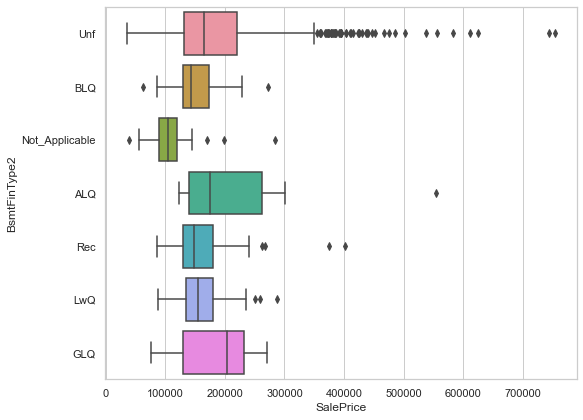

In [462]:
boxplot_vs_saleprice(['BsmtFinType2'])

#### Observations

- Highest SalePrice recorded for the following feature categories.
    - **BsmtQual* - **Excellent (100+ inches)** quality basement
    - **BsmtFinType1** - **GLQ** Good Living Quarters


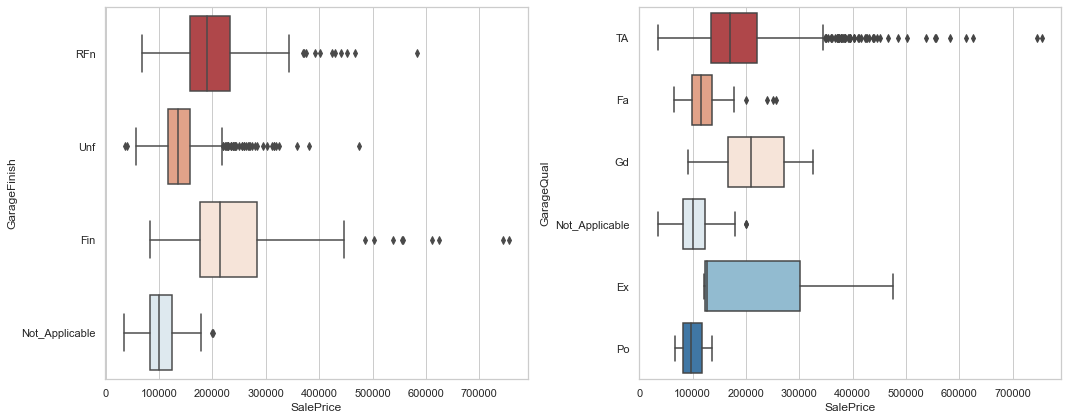

In [463]:
boxplot_vs_saleprice(['GarageFinish','GarageQual'])

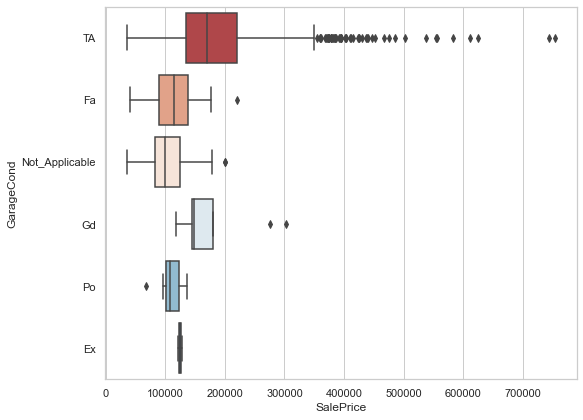

In [464]:
boxplot_vs_saleprice(['GarageCond'])

#### Observations

- **GarageFinish** - Highest SalePrice recorded for the houses with **finished** garage.


- **GarageCond** - Number of houses with **excellect** garage condition is very low.


- **GarageCond** and **GarageQual** - SalePrice range is very high for the **Typical/Average** typed Garage Quality and Condition features.


### Categorical Variables - Unordered Features


In [465]:
unordered_cat_cols = ['MSZoning', 'Street',  'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'SaleType','SaleCondition']


In [466]:
df[unordered_cat_cols].head()

MSZoning Street LandContour LotConfig Neighborhood Condition1 Condition2  \
0       RL   Pave         Lvl    Inside      CollgCr       Norm       Norm   
1       RL   Pave         Lvl       FR2      Veenker      Feedr       Norm   
2       RL   Pave         Lvl    Inside      CollgCr       Norm       Norm   
3       RL   Pave         Lvl    Corner      Crawfor       Norm       Norm   
4       RL   Pave         Lvl       FR2      NoRidge       Norm       Norm   

  BldgType RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType Foundation  \
0     1Fam     Gable  CompShg     VinylSd     VinylSd    BrkFace      PConc   
1     1Fam     Gable  CompShg     MetalSd     MetalSd       None     CBlock   
2     1Fam     Gable  CompShg     VinylSd     VinylSd    BrkFace      PConc   
3     1Fam     Gable  CompShg     Wd Sdng     Wd Shng       None     BrkTil   
4     1Fam     Gable  CompShg     VinylSd     VinylSd    BrkFace      PConc   

  Heating Electrical GarageType PavedDrive SaleType SaleCondition  
0    GasA      SBrkr     Attchd          Y       WD        Normal  
1    GasA      SBrkr     Attchd          Y       WD        Normal  
2    GasA      SBrkr     Attchd          Y       WD        Normal  
3    GasA      SBrkr     Detchd          Y       WD       Abnorml  
4    GasA      SBrkr     Attchd          Y       WD        Normal

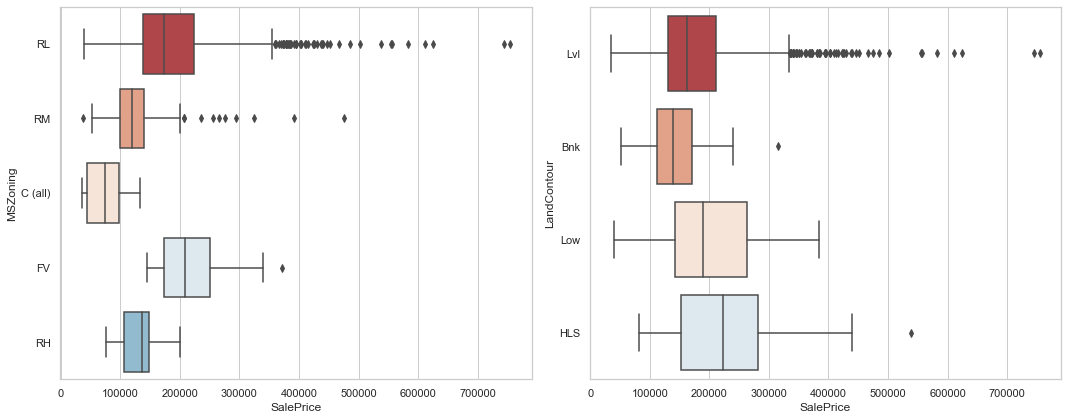

In [467]:
boxplot_vs_saleprice(['MSZoning',  'LandContour'])


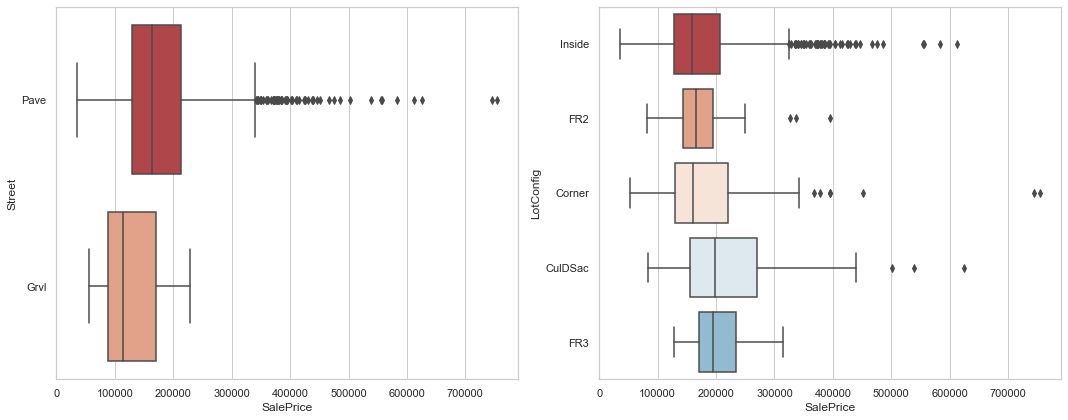

In [468]:
boxplot_vs_saleprice([ 'Street', 'LotConfig'])


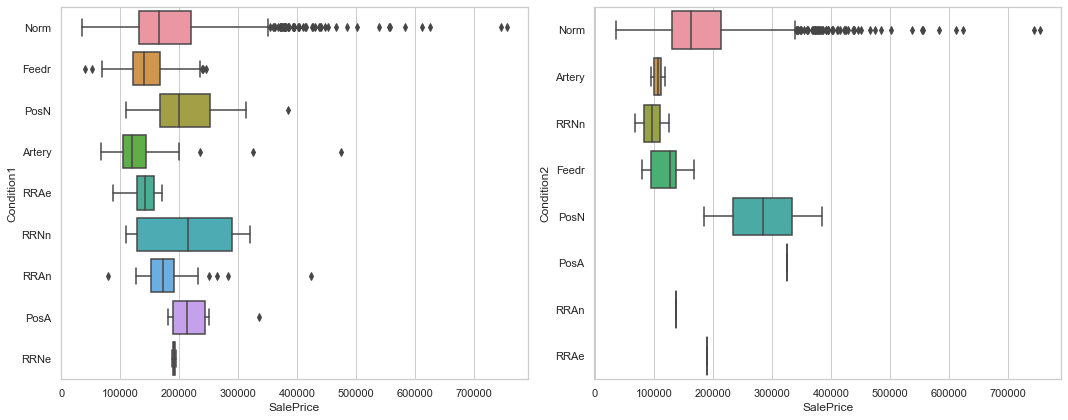

In [469]:
boxplot_vs_saleprice(['Condition1' , 'Condition2'])


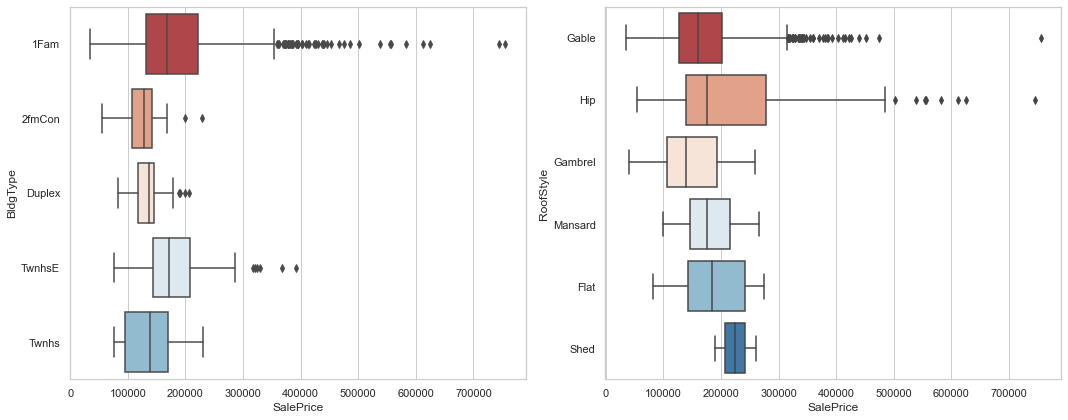

In [470]:
boxplot_vs_saleprice([ 'BldgType', 'RoofStyle'])


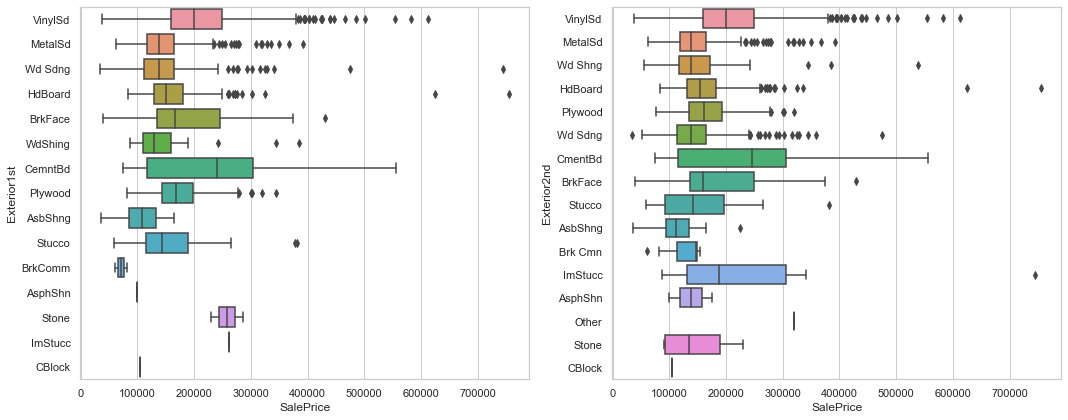

In [471]:
boxplot_vs_saleprice(['Exterior1st', 'Exterior2nd'])


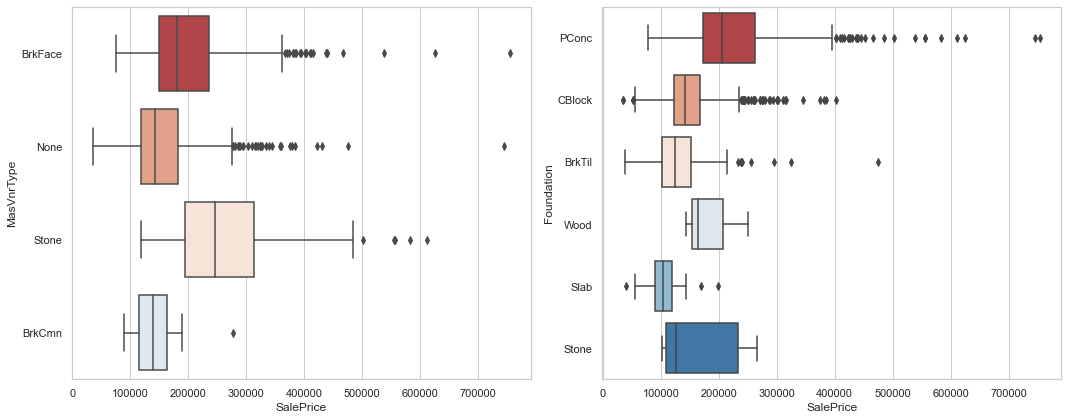

In [472]:
boxplot_vs_saleprice(['MasVnrType', 'Foundation'])


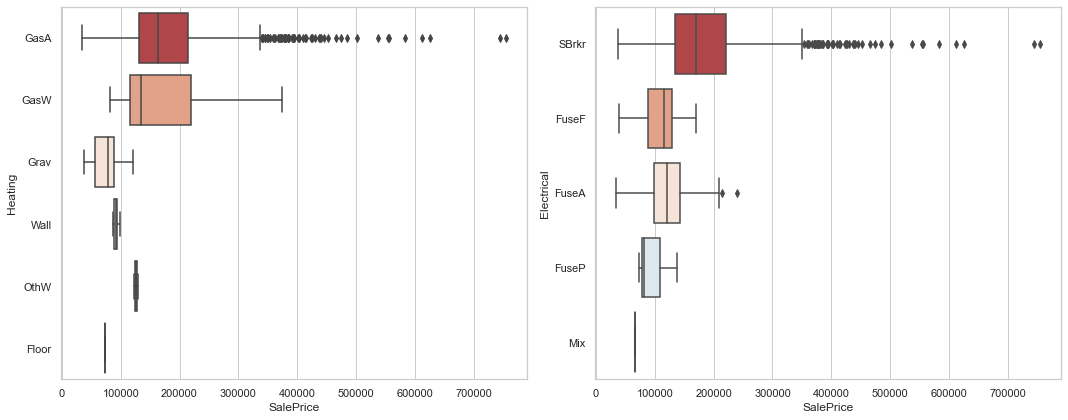

In [473]:
boxplot_vs_saleprice(['Heating', 'Electrical'])


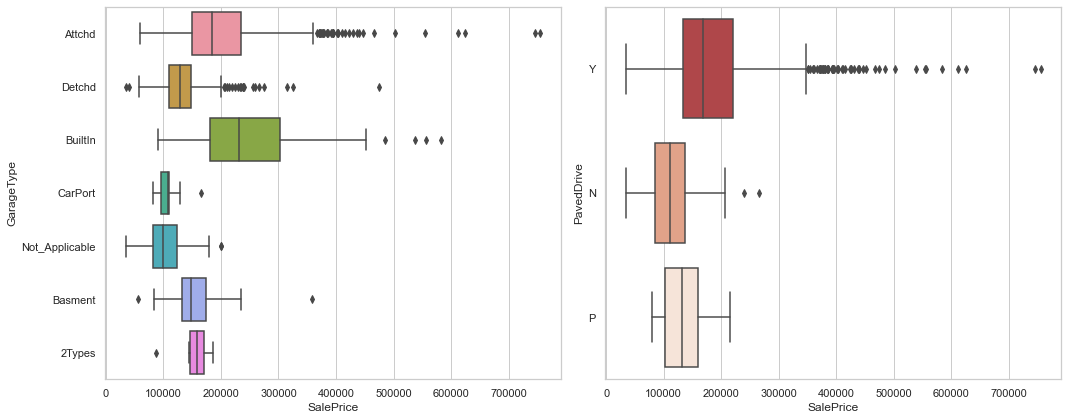

In [474]:
boxplot_vs_saleprice(['GarageType','PavedDrive'])


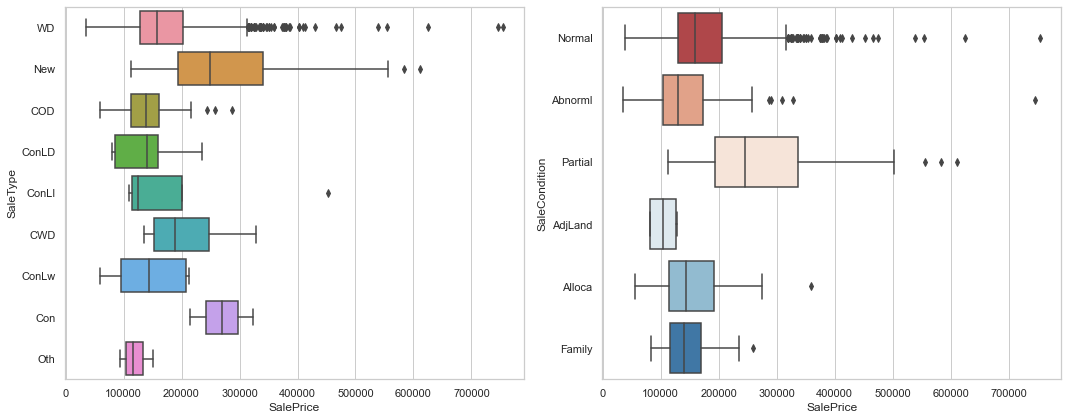

In [475]:
boxplot_vs_saleprice(['SaleType','SaleCondition'])


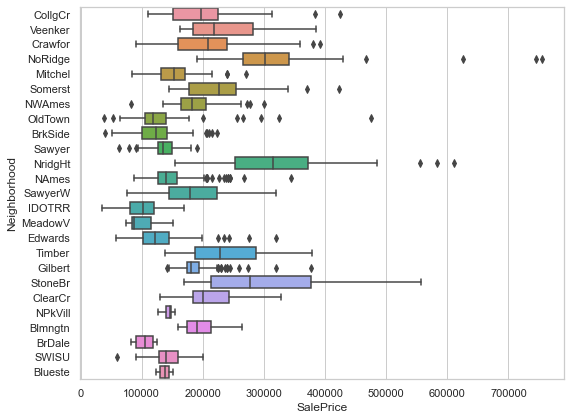

In [476]:
boxplot_vs_saleprice(['Neighborhood'])


#### Observations

- Highest **SalePrice** recorded for the following feature categories.
    - **MSZoning** - **RL**	(Residential Low Density)
    - **Condition1** - **Norm** Normal	
    - **Condition2** - **Norm** Normal	
    - **Foundation** - **PConc** Poured Contrete	
    - **Electrical** - **SBrkr** Standard Circuit Breakers & Romex	
    - **Heating** - **GasA** Gas forced warm air furnace
    - **GarageType** - **Attchd** Attached to home	
    - **SaleType** - **WD** and **New** -> with warranty and/or Home just constructed and sold
    - **Sale condition** - **Normal** Normal Sale
	

- Some of the labels in features such as **Exterior1st**, **Exterior2nd** and **RoofMatl** has very low data volume and these may not influence the prediction model.


- Most of the houses are newly built.


### Categorical Variables - Encoding


####  Encoding - Ordered Categorical variables


In [477]:
## Use the map function to map the Category string labels to number values.
df['GarageFinish'] = df['GarageFinish'].map({'Not_Applicable':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual']   = df['GarageQual'].map({'Not_Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond']   = df['GarageCond'].map({'Not_Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df['BsmtExposure'].map({'Not_Applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'Not_Applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'Not_Applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['LotShape']     = df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df['Utilities']    = df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
df['LandSlope']    = df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
df['HouseStyle']   = df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
df['ExterQual']    = df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond']    = df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual']     = df['BsmtQual'].map({'Not_Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond']     = df['BsmtCond'].map({'Not_Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['HeatingQC']    = df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir']   = df['CentralAir'].map({'N':0,'Y':1})
df['KitchenQual']  = df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['Functional']   = df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
df['FireplaceQu']  = df['FireplaceQu'].map({'Not_Applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})


In [478]:
# Observe the encoded column values
df[ordered_cat_cols].head()

GarageFinish  GarageQual  GarageCond  BsmtExposure  BsmtFinType1  \
0             2           3           3             1             6   
1             2           3           3             4             5   
2             2           3           3             2             6   
3             1           3           3             1             5   
4             2           3           3             3             6   

   BsmtFinType2  LotShape  Utilities  LandSlope  HouseStyle  ExterQual  \
0             1         3          3          0           3          3   
1             1         3          3          0           0          2   
2             1         0          3          0           3          3   
3             1         0          3          0           3          2   
4             1         0          3          0           3          3   

   ExterCond  BsmtQual  BsmtCond  HeatingQC  CentralAir  KitchenQual  \
0          2         4         3          4           1            3   
1          2         4         3          4           1            2   
2          2         4         3          4           1            3   
3          2         3         4          3           1            3   
4          2         4         3          4           1            3   

   Functional  FireplaceQu  
0           0            0  
1           0            3  
2           0            3  
3           0            4  
4           0            3

####  Encoding - Unordered Categorical variables


In [479]:
df_with_dummy = pd.get_dummies(df[unordered_cat_cols], drop_first=True)

In [480]:
df_with_dummy.head()


MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                0                0                1                  0   
1                0                0                1                  0   
2                0                0                1                  0   
3                0                0                1                  0   
4                0                0                1                  0   

   LotConfig_FR2  ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0              0  ...               0               0             0   
1              1  ...               0               0             0   
2              0  ...               0               0             0   
3              0  ...               0               0             0   
4              1  ...               0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 134 columns]

In [481]:
df_with_dummy.shape

(1451, 134)

#### Observations
- After encoding the total feature count become 134.
- During the EDA for some categorical features it was observed that few labels were dominating while others has very low contribution.
- Highly imbalanced features/labels which has same value for majority of the rows (95% or more) can be dropped.

In [482]:
labels_to_drop = []
highest_percentage = []

for col in df_with_dummy.columns:
    highest_p = df_with_dummy[col].value_counts()[0]/df_with_dummy.shape[0]
    if  highest_p >= 0.95:
        labels_to_drop.append(col)
        highest_percentage.append(highest_p)
        
for i in range(0, len(labels_to_drop)):
    print(labels_to_drop[i] + ' : '  +str(highest_percentage[i]))
print()
print('Number of features to be dropped : {}'.format(len(labels_to_drop)))


MSZoning_FV : 0.9572708476912474
MSZoning_RH : 0.988973121984838
LandContour_HLS : 0.9655410062026188
LandContour_Low : 0.9751895244658856
LotConfig_FR2 : 0.9676085458304617
LotConfig_FR3 : 0.9972432804962095
Neighborhood_Blueste : 0.9986216402481047
Neighborhood_BrDale : 0.988973121984838
Neighborhood_BrkSide : 0.9600275671950379
Neighborhood_ClearCr : 0.9807029634734665
Neighborhood_Crawfor : 0.9655410062026188
Neighborhood_IDOTRR : 0.974500344589938
Neighborhood_MeadowV : 0.9882839421088904
Neighborhood_Mitchel : 0.9662301860785665
Neighborhood_NPkVill : 0.9937973811164714
Neighborhood_NoRidge : 0.9717436250861475
Neighborhood_SWISU : 0.9827705031013094
Neighborhood_SawyerW : 0.9600275671950379
Neighborhood_StoneBr : 0.9827705031013094
Neighborhood_Timber : 0.974500344589938
Neighborhood_Veenker : 0.9924190213645762
Condition1_PosA : 0.994486560992419
Condition1_PosN : 0.9869055823569952
Condition1_RRAe : 0.9924190213645762
Condition1_RRAn : 0.9820813232253618
Condition1_RRNe : 0.99

In [483]:
# Drop the above highly imbalanced dummy variables which has same value for 95% or more rows.

df_with_dummy = df_with_dummy.drop(labels_to_drop, axis=1)

print(df_with_dummy.shape)


(1451, 48)


##### After the removing the highly imbalanced dummy variables now we have **48** dummy variables remaining

In [484]:
df.shape

(1451, 63)

##### Now we can add the dummy variables to the original data frame and remove the original unordered category variables which are now represented with dummy variables.

In [485]:
# Add the dummy variables to the main housing dataframe
df = pd.concat([df,df_with_dummy],axis=1)

df.shape

(1451, 111)

In [486]:
# Drop the original unordered categorical variables
df.drop(unordered_cat_cols, axis=1, inplace=True)


In [487]:
len(df.columns)

91

In [488]:
df.shape

(1451, 91)

##### Finally we are left with **91** features before we focus on modeling.

### Split the data set into Train and Test Data


In [489]:
## separate out the target variable
X = df.drop(['SalePrice'], axis=1)
X.head()


MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0          60         65.0   8450.0         3          3          0   
1          20         80.0   9600.0         3          3          0   
2          60         68.0  11250.0         0          3          0   
3          70         60.0   9550.0         0          3          0   
4          60         84.0  14260.0         0          3          0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  ...  Electrical_SBrkr  \
0           3            7          5.0         19  ...                 1   
1           0            6          7.5         46  ...                 1   
2           3            7          5.0         21  ...                 1   
3           3            7          5.0        107  ...                 1   
4           3            8          5.0         22  ...                 1   

   GarageType_Attchd  GarageType_BuiltIn  GarageType_Detchd  \
0                  1                   0                  0   
1                  1                   0                  0   
2                  1                   0                  0   
3                  0                   0                  1   
4                  1                   0                  0   

   GarageType_Not_Applicable  PavedDrive_Y  SaleType_New  SaleType_WD  \
0                          0             1             0            1   
1                          0             1             0            1   
2                          0             1             0            1   
3                          0             1             0            1   
4                          0             1             0            1   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 90 columns]

#### As we observed during the EDA **SalePrice** is right skewed and we need to transform it.

In [490]:
y = np.log(df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

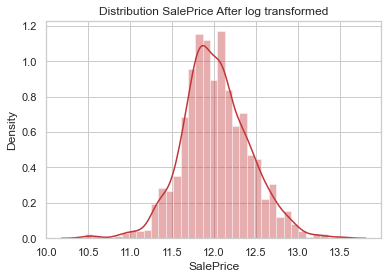

In [491]:
sns.distplot(y)
plt.title('Distribution SalePrice After log transformed')
plt.show()


In [492]:
# Split the data set with sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [493]:
# Observe the splitted data shapes 
print(X_train.shape)
print(X_test.shape)


(1160, 90)
(291, 90)


In [494]:
print(y_train.shape)
print(y_test.shape)

(1160,)
(291,)


### Handling missing values in numerical features (Imputation)

- This has to be done after test data split as this process would influence the test data if it's done before the split.

In [495]:
printPositiveNullCounts()
printNullValuePercentage()

LotFrontage    257
dtype: int64
Number of columns with null values 1
LotFrontage    17.711923
dtype: float64


#### Only the **LotFrontage** feature is left with missing values

In [496]:
### Check the null value percentage again

In [497]:
printNullValuePercentage()
print(df_with_dummy.shape)


LotFrontage    17.711923
dtype: float64
(1451, 48)


In [498]:
# Imputing missing value of LotFrontage for both test and train sets.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [499]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])


In [500]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])


### Feature Scaling


In [501]:
### Observe the values before scalling
X_train.values


array([[5.0000e+01, 5.4000e+01, 6.3420e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.4500e+02, 2.7500e+01, 2.5220e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 7.0000e+01, 7.9310e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [5.0000e+01, 5.0000e+01, 9.0000e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 4.8000e+01, 1.0635e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 6.7000e+01, 1.0656e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [502]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [503]:
X_train_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_test_scaled  = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)


In [504]:
# Observe the values after scalling 

## Train data
print(X_train_scaled) 


      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.137941    -0.840191 -0.892882  0.747271   0.029374  -0.225421   
1       2.389253    -2.335542 -1.956426  0.747271   0.029374  -0.225421   
2      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
3      -0.936002     0.000000 -0.396469 -1.386037   0.029374  -0.225421   
4      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
5      -0.137941     0.000000 -0.921280  0.747271   0.029374  -0.225421   
6      -0.936002    -0.558050  0.290659 -1.386037   0.029374  -0.225421   
7      -0.936002    -0.501621  0.014193  0.747271   0.029374  -0.225421   
8      -0.936002     0.000000  2.261973 -0.674935   0.029374  -0.225421   
9      -0.936002     0.344804  1.394851  0.747271   0.029374  -0.225421   
10     -0.936002    -1.065905 -0.040098  0.747271   0.029374  -0.225421   
11      0.128080     0.006234 -0.545420  0.747271   0.029374  -0.225421   
12      0.527110    -0.50

In [505]:
## test data
print(X_test_scaled) 

     MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0     -0.936002     0.626945  0.233027  0.747271   0.029374  -0.225421   
1     -0.936002     1.247657  1.279587  0.747271   0.029374  -0.225421   
2      2.389253     0.344804  0.577983  0.747271   0.029374  -0.225421   
3      0.527110     1.304086 -1.121739  0.747271   0.029374  -0.225421   
4     -0.936002     2.404438  2.261973  0.747271   0.029374  -0.225421   
5      0.394100    -0.783763 -0.285103  0.747271   0.029374  -0.225421   
6     -0.936002    -0.050195 -0.204641  0.747271   0.029374  -0.225421   
7      0.128080     0.062662 -0.319904  0.747271   0.029374  -0.225421   
8      0.128080     0.000000  2.261973 -0.674935   0.029374  -0.225421   
9     -0.936002    -0.501621 -0.654002  0.747271   0.029374  -0.225421   
10    -0.669982    -1.348046 -0.362224  0.747271   0.029374  -0.225421   
11    -0.137941     0.514089  0.263653  0.747271   0.029374  -0.225421   
12     2.389253     0.401232 -0.534284

### Initial Feature Selection


### Use RFE for feature selection

In [506]:
# Use RFE to select top featuers, given a input **n** the function would give top n number of features.

def rfe_top_n_features(n):
    top_features = []
    
    lm = LinearRegression()
    lm.fit(X_train_scaled, y_train)
    rfe = RFE(lm, n_features_to_select=n)
    rfe = rfe.fit(X_train_scaled, y_train)

    print("##########################################")
    print("Top %d features selected using RFE : " %n)
    print("##########################################")
    rfe_selections = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_selections:
        if i[1]:
            top_features.append(i[0])
    print(top_features)
    return top_features


In [507]:
# statistical summary
# Use statsmodels.api OLS(Ordinary least squares) function to build and study the models for a given list of features

def statmodel_ols_stats(X_train, y_train, features):
    X_train_ols = sm.add_constant(X_train[features])
    lr = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lr.summary())  

#### We will try different number of features with RFE and analysis them with statmodel OLS function.

##### TOP 45 Feature analysis

In [508]:
top_45 = rfe_top_n_features(45)

##########################################
Top 45 features selected using RFE : 
##########################################
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_Applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']


In [509]:
statmodel_ols_stats(X_train_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     268.5
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:56:22   Log-Likelihood:                 875.24
No. Observations:                1160   AIC:                            -1658.
Df Residuals:                    1114   BIC:                            -1426.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### TOP 50 Feature analysis

In [510]:
top_50 = rfe_top_n_features(50)

##########################################
Top 50 features selected using RFE : 
##########################################
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_Applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'Sal

In [511]:
statmodel_ols_stats(X_train_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     243.7
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:56:22   Log-Likelihood:                 882.16
No. Observations:                1160   AIC:                            -1662.
Df Residuals:                    1109   BIC:                            -1404.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##### TOP 55 Feature analysis

In [512]:
top_55 = rfe_top_n_features(55)

##########################################
Top 55 features selected using RFE : 
##########################################
['LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_Detchd',

In [513]:
statmodel_ols_stats(X_train_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     231.0
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:56:22   Log-Likelihood:                 886.21
No. Observations:                1160   AIC:                            -1664.
Df Residuals:                    1106   BIC:                            -1391.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Observations on Feature combinations based on OLS

- Adjusted R-square
    - Top 45 Features : **0.912**
    - Top 50 Features : **0.913**
    - Top 55 Features : **0.913**
 
 
- Adjusted R-square 
    - "Top 50 Features" > "Top 45 Features" 
    - "Top 50 Features" = "Top 55 Features" 
 
 
- Based on the above statistics it seems the Top 50 feature combination selected from RFE function seems to be the optimium choise.


#### Extract the final train and test data sets for the top 50 features selected by RFE

In [514]:
X_train_rfe_t50 = X_train_scaled[top_50]
X_test_rfe_t50  = X_test_scaled[top_50]


In [515]:
# Print the statistics for the given model
def print_model_evaluation_stats(modelType, alpha, y_train, y_train_pred, y_test, y_test_pred):
    print(modelType," Regression with ",alpha)
    print("===================================")
    print('R2 score (train) : ',r2_score(y_train,y_train_pred))
    print('R2 score (test)  : ',r2_score(y_test,y_test_pred))
    print('RMSE (train)     : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('RMSE (test)      : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

In [516]:
# plot alpha vs scoring (neg_mean_absolute_error)
def plot_alpha_vs_NegMeanAbsError(params,model_type,cv_model):
    plt.figure(figsize=(10,5))
    plt.plot(params['alpha'],cv_model.cv_results_['mean_test_score'])
    plt.plot(params['alpha'],cv_model.cv_results_['mean_train_score'])
    plt.title("Alpha vs Train/Test Scores for "+model_type)
    plt.xscale('log')
    plt.legend(['Test','Train'])
    plt.xlabel("alpha")
    plt.ylabel('neg_mean_absolute_error')
    plt.axvline(x = cv_model.best_params_["alpha"], color = 'r')
    plt.show()

In [517]:

# Function to build model, cross-validation , ploting and model-evoluation 

def build_regression_model(X_train, y_train, X_test, params, model_type):
    if model_type == 'lasso':
        estimator_model = Lasso()
    else:
        estimator_model = Ridge()
        
    cv_model = GridSearchCV(
                          estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
    cv_model.fit(X_train, y_train)
    
    alpha = cv_model.best_params_["alpha"]
    
    # plot alpha vs scoring (neg_mean_absolute_error)
    plot_alpha_vs_NegMeanAbsError(params,model_type,cv_model)
    
    print("Optimum alpha for %s is %f" %(model_type, alpha))
    best_model = cv_model.best_estimator_

    print(best_model)
    best_model.fit(X_train, y_train)
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # print the final model statistics
    print_model_evaluation_stats(model_type, alpha,y_train,y_train_pred,y_test,y_test_pred)

    return best_model, y_test_pred


### Model building - Lasso Regression

Fitting 5 folds for each of 12 candidates, totalling 60 fits


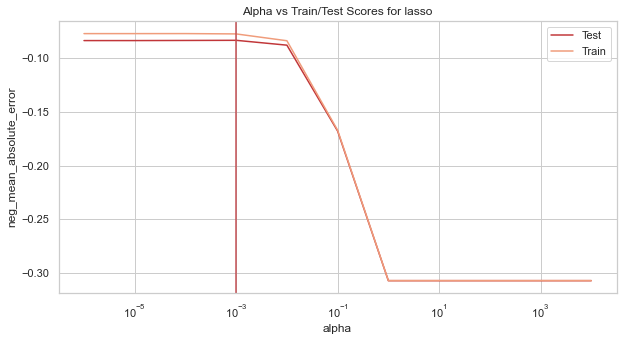

Optimum alpha for lasso is 0.001000
Lasso(alpha=0.001)
lasso  Regression with  0.001
R2 score (train) :  0.9155934076461315
R2 score (test)  :  0.8762584764779385
RMSE (train)     :  0.11377553949488149
RMSE (test)      :  0.15039384105419779


In [518]:
# set up the params used for ridge regression
params_lasso = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

# Build and evaulate to ridge model
lasso_model, y_test_predicted = build_regression_model(X_train_rfe_t50, y_train, X_test_rfe_t50, params_lasso,'lasso')

In [519]:

lasso_df = pd.DataFrame({'Features':X_train_rfe_t50.columns, 'Coefficient':lasso_model.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
print('#######################################################')
print("Top 20 Features for Lasso Regression with alpha  0.001")
print('#######################################################')
pd.set_option('display.max_rows', None)
lasso_df.sort_values('Coefficient',ascending=False).head(20)



#######################################################
Top 20 Features for Lasso Regression with alpha  0.001
#######################################################


Features  Coefficient
10               1stFlrSF       0.1249
11               2ndFlrSF       0.1018
2             OverallQual       0.0810
3             OverallCond       0.0495
0                 LotArea       0.0341
45  SaleCondition_Partial       0.0335
44   SaleCondition_Normal       0.0282
22            MSZoning_RL       0.0270
7              BsmtFinSF1       0.0265
5                BsmtQual       0.0243
19             GarageArea       0.0228
31        Condition1_Norm       0.0223
17             Fireplaces       0.0218
29   Neighborhood_Somerst       0.0218
12           BsmtFullBath       0.0173
40       Foundation_PConc       0.0170
15            KitchenQual       0.0143
28   Neighborhood_NridgHt       0.0138
8               HeatingQC       0.0134
18           GarageFinish       0.0105

#### Observation on Lasso   regression

- R2 score on train set is **0.92** and and on test set it's **0.88**.
    - This implies that **88%** of the test data can be explained by the ridge regression model.
    - Also this implies this model predicting well and not overfitted ( train vs test score difference is low)



- Root Mean Square Error on train is **0.11** and on test it's **0.15**.
    - This implies that the prediction done using this model can be off by 0.15 units.
    
    
- Top 10 Features
    - 1stFlrSF
    - 2ndFlrSF
    - OverallQual
    - OverallCond
    - LotArea
    - SaleCondition_Partial
    - SaleCondition_Normal
    - MSZoning_RL
    - BsmtFinSF1
    - BsmtQual

### Model building - Ridge Regression

In [520]:
# set up the params used for ridge regression

params_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

Fitting 5 folds for each of 27 candidates, totalling 135 fits


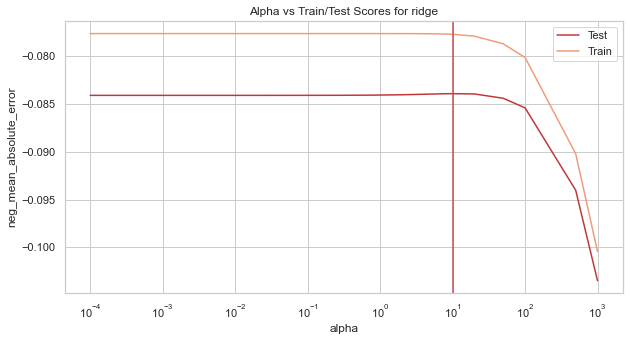

Optimum alpha for ridge is 10.000000
Ridge(alpha=10.0)
ridge  Regression with  10.0
R2 score (train) :  0.9164833630870457
R2 score (test)  :  0.8727209869013675
RMSE (train)     :  0.11317414406896789
RMSE (test)      :  0.15252840243674898


In [521]:
# Build and evaulate to ridge model
ridge_model, y_test_predicted = build_regression_model(X_train_rfe_t50, y_train, X_test_rfe_t50, params_ridge,'ridge')


In [522]:
ridge_df = pd.DataFrame({'Features':X_train_rfe_t50.columns, 'Coefficient':ridge_model.coef_.round(4)})
ridge_df = ridge_df[ridge_df['Coefficient'] != 0.00]
ridge_df.reset_index(drop=True, inplace=True)
print('#######################################################')
print("Top 20 Features for Ridge Regression with alpha 10")
print('#######################################################')
pd.set_option('display.max_rows', None)
ridge_df.sort_values('Coefficient',ascending=False).head(20)


#######################################################
Top 20 Features for Ridge Regression with alpha 10
#######################################################


Features  Coefficient
10               1stFlrSF       0.1232
11               2ndFlrSF       0.1004
2             OverallQual       0.0783
3             OverallCond       0.0492
0                 LotArea       0.0348
49  SaleCondition_Partial       0.0343
48   SaleCondition_Normal       0.0289
22            MSZoning_RL       0.0288
7              BsmtFinSF1       0.0262
31        Condition1_Norm       0.0242
5                BsmtQual       0.0239
29   Neighborhood_Somerst       0.0226
19             GarageArea       0.0225
17             Fireplaces       0.0224
12           BsmtFullBath       0.0189
45      GarageType_Detchd       0.0160
43       Foundation_PConc       0.0156
40     MasVnrType_BrkFace       0.0150
44      GarageType_Attchd       0.0149
41        MasVnrType_None       0.0147

#### Observation on Ridge  regression

- R2 score on train set is **0.92** and and on test set it's **0.87**.
    - This implies that **87%** of the test data can be explained by the ridge regression model.
    - Also this implies this model predicting well and not overfitted ( train vs test score difference is low)


- Root Mean Square Error on train is **0.11** and on test it's **0.152**.
    - This implies that the prediction done using this model can be off by 0.152 units.


- Top 10 features
    - 1stFlrSF
    - 2ndFlrSF
    - verallQual
    - verallCond
    - LotArea	
    - SaleCondition_Partial
    - SaleCondition_Normal
    - MSZoning_RL
    - smtFinSF1
    - Condition1_Norm



### Lasso vs Ridge Model Coefficients Comparision

In [523]:
lm_coefficients = pd.DataFrame(index=X_test_rfe_t50.columns)
lm_coefficients.rows = X_test_rfe_t50.columns

lm_coefficients['Ridge (alpha=10.0)'] =  ridge_model.coef_
lm_coefficients['Lasso (alpha=0.001)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
lm_coefficients

Ridge (alpha=10.0)  Lasso (alpha=0.001)
LotArea                              0.034804             0.034087
LandSlope                            0.009355             0.009267
OverallQual                          0.078283             0.080978
OverallCond                          0.049212             0.049535
YearBuilt                           -0.037339            -0.038883
BsmtQual                             0.023930             0.024275
BsmtExposure                         0.009537             0.009138
BsmtFinSF1                           0.026195             0.026462
HeatingQC                            0.012731             0.013379
CentralAir                           0.008782             0.007715
1stFlrSF                             0.123249             0.124870
2ndFlrSF                             0.100372             0.101843
BsmtFullBath                         0.018852             0.017312
FullBath                             0.010357             0.007465
HalfBath                             0.010886             0.009171
KitchenQual                          0.014267             0.014271
Functional                          -0.026037            -0.025176
Fireplaces                           0.022355             0.021818
GarageFinish                         0.011776             0.010493
GarageArea                           0.022501             0.022827
GarageQual                           0.013604             0.006287
OpenPorchSF                          0.008990             0.007929
MSZoning_RL                          0.028806             0.026999
Street_Pave                          0.008952             0.008483
LotConfig_CulDSac                    0.006971             0.006468
Neighborhood_Edwards                -0.014902            -0.012831
Neighborhood_NAmes                  -0.009873            -0.007111
Neighborhood_NWAmes                 -0.007614            -0.005607
Neighborhood_NridgHt                 0.014707             0.013762
Neighborhood_Somerst                 0.022615             0.021795
Condition1_Feedr                     0.011467             0.009291
Condition1_Norm                      0.024228             0.022297
Condition2_Norm                      0.009404             0.008584
RoofStyle_Gable                     -0.024447            -0.008143
RoofStyle_Hip                       -0.019260            -0.003146
Exterior1st_HdBoard                 -0.018130            -0.009225
Exterior1st_Plywood                 -0.008015            -0.005222
Exterior1st_Wd Sdng                 -0.019157            -0.011669
Exterior2nd_HdBoard                  0.007759             0.000000
Exterior2nd_Wd Sdng                  0.012883             0.005000
MasVnrType_BrkFace                   0.015031             0.000000
MasVnrType_None                      0.014725             0.000000
MasVnrType_Stone                     0.011624             0.001738
Foundation_PConc                     0.015572             0.017009
GarageType_Attchd                    0.014866             0.009140
GarageType_Detchd                    0.016039             0.009126
GarageType_Not_Applicable            0.010211            -0.000000
PavedDrive_Y                         0.010335             0.008621
SaleCondition_Normal                 0.028911             0.028170
SaleCondition_Partial                0.034285             0.033492

In [524]:
# Use anti-log to convert back the prediction values to original scale

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)

# view first 5 values
print(test_prediction[:5])


[293793 218900 138745 115263 145914]


### Choosing the best model "Lasso" vs "Ridge"

- Both Ridge and Lasso Regression has almost same train R2 Score while Lasso has a slighly better test Score ( **0.88** vs **0.87**)


- There are **6** common features if we compare the top 10 features from both models.


- Root Mean Square Error for Lasso is slightly lower than ridge hence Lasso is better.


- Some of the coefficient in Lasso model became 0 ( eg:- **Exterior2nd_HdBoard**,**MasVnrType_BrkFace** etc) hence it helps to do feature reduction.
    - 4 Features has been removed.


- With these comparisions we can conclude that the Lasso model is better than Ridge model hence we go with the Lasso Model.

In [525]:


lm_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)


Lasso (alpha=0.001)
1stFlrSF                              0.124870
2ndFlrSF                              0.101843
OverallQual                           0.080978
OverallCond                           0.049535
LotArea                               0.034087
SaleCondition_Partial                 0.033492
SaleCondition_Normal                  0.028170
MSZoning_RL                           0.026999
BsmtFinSF1                            0.026462
BsmtQual                              0.024275
GarageArea                            0.022827
Condition1_Norm                       0.022297
Fireplaces                            0.021818
Neighborhood_Somerst                  0.021795
BsmtFullBath                          0.017312
Foundation_PConc                      0.017009
KitchenQual                           0.014271
Neighborhood_NridgHt                  0.013762
HeatingQC                             0.013379
GarageFinish                          0.010493
Condition1_Feedr                      0.009291
LandSlope                             0.009267
HalfBath                              0.009171
GarageType_Attchd                     0.009140
BsmtExposure                          0.009138
GarageType_Detchd                     0.009126
PavedDrive_Y                          0.008621
Condition2_Norm                       0.008584
Street_Pave                           0.008483
OpenPorchSF                           0.007929
CentralAir                            0.007715
FullBath                              0.007465
LotConfig_CulDSac                     0.006468
GarageQual                            0.006287
Exterior2nd_Wd Sdng                   0.005000
MasVnrType_Stone                      0.001738
GarageType_Not_Applicable            -0.000000
Exterior2nd_HdBoard                   0.000000
MasVnrType_BrkFace                    0.000000
MasVnrType_None                       0.000000
RoofStyle_Hip                        -0.003146
Exterior1st_Plywood                  -0.005222
Neighborhood_NWAmes                  -0.005607
Neighborhood_NAmes                   -0.007111
RoofStyle_Gable                      -0.008143
Exterior1st_HdBoard                  -0.009225
Exterior1st_Wd Sdng                  -0.011669
Neighborhood_Edwards                 -0.012831
Functional                           -0.025176
YearBuilt                            -0.038883

### Final list of features ordered by Coefficients(feature importance) for Lasso model

- Out of the initial 50 features 4 of them are reduced by the model to make it final count of 46 features.

In [526]:
# Top 50 features.
lasso_df.sort_values('Coefficient',ascending=False).head(50).style.hide_index()

In [527]:
# Top 10 features.
lasso_df.sort_values('Coefficient',ascending=False).head(10).style.hide_index()

### Conclusions

- Based on the analysis done on the given data set following are the most significant variables in predicting the price of a house.

    - 1stFlrSF 		: First Floor square feet
    - 2ndFlrSF 		: Second floor square feet
    - OverallQual 	: Rates the overall material and finish of the house
    - OverallCond 	: Rates the overall condition of the house
    - LotArea 		: Lot size in square feet
    - SaleCondition_Partial : Condition of sale with value Partial(Home was not completed when last assessed (associated with New Homes))
    - SaleCondition_Normal :  Normal Condition of sale
    - MSZoning_RL : Identifies the general zoning classification of the sale with Residential Low Density
    - BsmtFinSF1 : Type 1 finished square feet
    - BsmtQual   : Evaluates the height of the basement

- How well the features describe the target feature( SalePrice)
    - example
        - for **1stFlrSF** an increase of 1 square foot, the price will increase by 0.1249 times
        - for **2ndFlrSF** an increase of 1 square foot, the price will increase by 0.1018 times

    - Similary other for other features 1 unit increase in those features would increase the SalePrice accordingly as defined the coefficient of that feature in the final model.


- Optimal value of the lamda of the Lasso is 0.001.


# Code for Assignment Part-II - Subjective Questions


### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

#### Ridge Alpha will be doubled from 10 to 20

In [528]:
ridge_model_20 = Ridge(alpha=20.0)
ridge_model_20.fit(X_train_rfe_t50, y_train)




Ridge(alpha=20.0)

In [529]:
# Predicting
y_train_pred = ridge_model_20.predict(X_train_rfe_t50)
y_test_pred =  ridge_model_20.predict(X_test_rfe_t50)

print("Model Evaluation Stats for : Ridge Regression, alpha=20.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test)  : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train)     : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test)      : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation Stats for : Ridge Regression, alpha=20.0
R2 score (train) :  0.9163
R2 score (test)  :  0.8736
RMSE (train)     :  0.1133
RMSE (test)      :  0.152


#### Lasso Alpha will be doubled from 0.001 to 0.002

In [530]:
lasso_model_002 = Lasso(alpha=0.002)
lasso_model_002.fit(X_train_rfe_t50, y_train)


Lasso(alpha=0.002)

In [531]:
y_train_pred = lasso_model_002.predict(X_train_rfe_t50)
y_test_pred =  lasso_model_002.predict(X_test_rfe_t50)

print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test)  : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train)     : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test)      : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.9145
R2 score (test)  :  0.8775
RMSE (train)     :  0.1145
RMSE (test)      :  0.1496


#### Consolidate and compare the coefficients 

In [532]:
lm_coefficients['Ridge (alpha = 20.0)'] = ridge_model_20.coef_
lm_coefficients['Lasso (alpha = 0.002)'] = lasso_model_002.coef_
pd.set_option('display.max_rows', None)
lm_coefficients

Ridge (alpha=10.0)  Lasso (alpha=0.001)  \
LotArea                              0.034804             0.034087   
LandSlope                            0.009355             0.009267   
OverallQual                          0.078283             0.080978   
OverallCond                          0.049212             0.049535   
YearBuilt                           -0.037339            -0.038883   
BsmtQual                             0.023930             0.024275   
BsmtExposure                         0.009537             0.009138   
BsmtFinSF1                           0.026195             0.026462   
HeatingQC                            0.012731             0.013379   
CentralAir                           0.008782             0.007715   
1stFlrSF                             0.123249             0.124870   
2ndFlrSF                             0.100372             0.101843   
BsmtFullBath                         0.018852             0.017312   
FullBath                             0.010357             0.007465   
HalfBath                             0.010886             0.009171   
KitchenQual                          0.014267             0.014271   
Functional                          -0.026037            -0.025176   
Fireplaces                           0.022355             0.021818   
GarageFinish                         0.011776             0.010493   
GarageArea                           0.022501             0.022827   
GarageQual                           0.013604             0.006287   
OpenPorchSF                          0.008990             0.007929   
MSZoning_RL                          0.028806             0.026999   
Street_Pave                          0.008952             0.008483   
LotConfig_CulDSac                    0.006971             0.006468   
Neighborhood_Edwards                -0.014902            -0.012831   
Neighborhood_NAmes                  -0.009873            -0.007111   
Neighborhood_NWAmes                 -0.007614            -0.005607   
Neighborhood_NridgHt                 0.014707             0.013762   
Neighborhood_Somerst                 0.022615             0.021795   
Condition1_Feedr                     0.011467             0.009291   
Condition1_Norm                      0.024228             0.022297   
Condition2_Norm                      0.009404             0.008584   
RoofStyle_Gable                     -0.024447            -0.008143   
RoofStyle_Hip                       -0.019260            -0.003146   
Exterior1st_HdBoard                 -0.018130            -0.009225   
Exterior1st_Plywood                 -0.008015            -0.005222   
Exterior1st_Wd Sdng                 -0.019157            -0.011669   
Exterior2nd_HdBoard                  0.007759             0.000000   
Exterior2nd_Wd Sdng                  0.012883             0.005000   
MasVnrType_BrkFace                   0.015031             0.000000   
MasVnrType_None                      0.014725             0.000000   
MasVnrType_Stone                     0.011624             0.001738   
Foundation_PConc                     0.015572             0.017009   
GarageType_Attchd                    0.014866             0.009140   
GarageType_Detchd                    0.016039             0.009126   
GarageType_Not_Applicable            0.010211            -0.000000   
PavedDrive_Y                         0.010335             0.008621   
SaleCondition_Normal                 0.028911             0.028170   
SaleCondition_Partial                0.034285             0.033492   

                           Ridge (alpha = 20.0)  Lasso (alpha = 0.002)  
LotArea                                0.035316               0.033867  
LandSlope                              0.009334               0.008625  
OverallQual                            0.078217               0.083373  
OverallCond                            0.048396               0.048229  
YearBuilt                             -0.034532              -0.037207  
BsmtQual          

In [533]:
#### Top 10 Feature in the new model for Lasso Alpha = 0.002

In [534]:
lm_coefficients.sort_values(by='Lasso (alpha = 0.002)', ascending=False).head(10)

Ridge (alpha=10.0)  Lasso (alpha=0.001)  \
1stFlrSF                         0.123249             0.124870   
2ndFlrSF                         0.100372             0.101843   
OverallQual                      0.078283             0.080978   
OverallCond                      0.049212             0.049535   
LotArea                          0.034804             0.034087   
SaleCondition_Partial            0.034285             0.033492   
BsmtFinSF1                       0.026195             0.026462   
SaleCondition_Normal             0.028911             0.028170   
BsmtQual                         0.023930             0.024275   
MSZoning_RL                      0.028806             0.026999   

                       Ridge (alpha = 20.0)  Lasso (alpha = 0.002)  
1stFlrSF                           0.119211               0.122612  
2ndFlrSF                           0.095980               0.098715  
OverallQual                        0.078217               0.083373  
OverallCond                        0.048396               0.048229  
LotArea                            0.035316               0.033867  
SaleCondition_Partial              0.033616               0.031883  
BsmtFinSF1                         0.026381               0.026736  
SaleCondition_Normal               0.028203               0.026372  
BsmtQual                           0.024159               0.025080  
MSZoning_RL                        0.028354               0.024982

### After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Approach
- Remove the Top 5 variables from final set of features used to build the last model.
    - This need to be removed from both train and test data.


- Previous Top 5 variables to be removed.
	- 1stFlrSF
	- 2ndFlrSF
	- OverallQual
	- OverallCond
	- LotArea


- Rebuild the model.

In [535]:
# Remove the previous top 5 variables from train data set X_train_rfe_t50.
X_train_new = X_train_rfe_t50.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'LotArea'], axis=1)

print("Number of features ",len(X_train_new.columns))
print(X_train_new.columns)


Number of features  45
Index(['LandSlope', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
       'HeatingQC', 'CentralAir', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea',
       'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave',
       'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard',
       'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard',
       'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'Foundation_PConc', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageType_Not_Applicable', 'PavedDrive_Y',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')


In [536]:
# Remove the previous top 5 variables from tes data set X_test_rfe_t50.
X_test_new = X_test_rfe_t50.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'LotArea'], axis=1)
print("Number of features ",len(X_test_new.columns))
print(X_test_new.columns)

Number of features  45
Index(['LandSlope', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
       'HeatingQC', 'CentralAir', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea',
       'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave',
       'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard',
       'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard',
       'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'Foundation_PConc', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageType_Not_Applicable', 'PavedDrive_Y',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')


In [537]:
## Use Lasso with Alpha 0.001 as in the previous model to build the new lasso model


new_lasso_model = Lasso(alpha=0.001)
new_lasso_model.fit(X_train_new, y_train)
y_train_pred = new_lasso_model.predict(X_train_new)
y_test_pred  = new_lasso_model.predict(X_test_new)
new_lasso_model

Lasso(alpha=0.001)

In [538]:
new_lasso_model.coef_

array([ 0.00970518,  0.0381155 ,  0.04331418,  0.02112349,  0.04090971,
        0.02549558,  0.02027302,  0.00974864,  0.09292149,  0.04803698,
        0.05300656, -0.02385741,  0.06056049,  0.01128443,  0.07972195,
       -0.        ,  0.02108129,  0.04828882,  0.01185319,  0.01835286,
       -0.01740909, -0.00848008, -0.00609299,  0.01527915,  0.01705838,
       -0.        ,  0.01039648,  0.0091107 , -0.03610194, -0.00465465,
       -0.01248501, -0.00786315, -0.01877043, -0.        ,  0.0178383 ,
        0.00772617, -0.        ,  0.00649764,  0.01413075,  0.0111402 ,
       -0.00350717,  0.        ,  0.0072177 ,  0.02377227,  0.03632882])

In [539]:
new_model_coefficients = pd.DataFrame(index=X_test_new.columns)
new_model_coefficients.rows = X_test_new.columns
new_model_coefficients['Lasso'] = new_lasso_model.coef_
new_model_coefficients.sort_values(by='Lasso', ascending=False).head(5)


Lasso
FullBath     0.092921
GarageArea   0.079722
Fireplaces   0.060560
KitchenQual  0.053007
MSZoning_RL  0.048289